# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

##Import Libraries

In [1]:
# filter warnings
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import library to split data into train and test sets
from sklearn.model_selection import train_test_split

# import library to build model for prediction
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# import library to compute variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import library to tune models
from sklearn.model_selection import GridSearchCV

# import library to check model performance
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score, 
                             confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve, make_scorer,)

# remove limit for displayed columns
pd.set_option('display.max_columns', None)

# set limit for displayed rows
pd.set_option('display.max_rows', 200)

# set floats to 5 decimal points
pd.set_option('display.float_format', lambda x: '%.5f' % x)

##Load the Data Set

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# read the data set
df = pd.read_csv('/content/drive/MyDrive/Great Learning/Supervised Learning Classification/Project 4/INNHotelsGroup.csv')

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

In [3]:
# return the first 5 rows
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [4]:
# return the last 5 rows
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

In [5]:
# return the number of rows and columns
df.shape

(36275, 19)

####Observations
* The data set has 36,275 rows and 19 columns.

In [6]:
# return a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

####Observations
* There are 13 columns of data type integer, 1 column of data type float, and 5 columns of data type object (string).

In [7]:
# check for duplicate values 
df.duplicated().sum()

0

####Observations
* There are no duplicate values in the data set.

In [8]:
# check data for the count of null values (missing values) in each column
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

####Observations 
* There are no missing values in the data set.

In [9]:
# create a copy of the data so original data remains unchanged
data = df.copy()

In [10]:
# drop booking_id column
data = data.drop('Booking_ID', axis = 1)

# return the first 5 rows
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [11]:
# describe the statistical summary of the categorical data
data.describe(include='object')

type_of_meal_plan room_type_reserved market_segment_type booking_status
count              36275              36275               36275          36275
unique                 4                  7                   5              2
top          Meal Plan 1        Room_Type 1              Online   Not_Canceled
freq               27835              28130               23214          24390

####Observations
* There are 4 meal plans, 7 reserved room types, 5 market segment types, and 2 options for booking status.
* Meal Plan 1 is the most popular meal plan with 27,835 booking selections.
* 28,130 guests selected room type 1, while 8,145 guests are spread across the other 6 room types.
* Most guests booked their room online.

In [12]:
# describe the statistical summary of the numerical data
data.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count   36275.00000     36275.00000           36275.00000        36275.00000   
mean        1.84496         0.10528               0.81072            2.20430   
std         0.51871         0.40265               0.87064            1.41090   
min         0.00000         0.00000               0.00000            0.00000   
25%         2.00000         0.00000               0.00000            1.00000   
50%         2.00000         0.00000               1.00000            2.00000   
75%         2.00000         0.00000               2.00000            3.00000   
max         4.00000        10.00000               7.00000           17.00000   

       required_car_parking_space   lead_time  arrival_year  arrival_month  \
count                 36275.00000 36275.00000   36275.00000    36275.00000   
mean                      0.03099    85.23256    2017.82043        7.42365   
std                       0.17328    85.93082       0.38384        3.06989   
min                       0.00000     0.00000    2017.00000        1.00000   
25%                       0.00000    17.00000    2018.00000        5.00000   
50%                       0.00000    57.00000    2018.00000        8.00000   
75%                       0.00000   126.00000    2018.00000       10.00000   
max                       1.00000   443.00000    2018.00000       12.00000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count   36275.00000     36275.00000                   36275.00000   
mean       15.59700         0.02564                       0.02335   
std         8.74045         0.15805                       0.36833   
min         1.00000         0.00000                       0.00000   
25%         8.00000         0.00000                       0.00000   
50%        16.00000         0.00000                       0.00000   
75%        23.00000         0.00000                       0.00000   
max        31.00000         1.00000                      13.00000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                           36275.00000         36275.00000   
mean                                0.15341           103.42354   
std                                 1.75417            35.08942   
min                                 0.00000             0.00000   
25%                                 0.00000            80.30000   
50%                                 0.00000            99.45000   
75%                                 0.00000           120.00000   
max                                58.00000           540.00000   

       no_of_special_requests  
count             36275.00000  
mean                  0.61966  
std                   0.78624  
min                   0.00000  
25%                   0.00000  
50%                   0.00000  
75%                   1.00000  
max                   5.00000

####Observations
* The average number of adults per booking is 1.84, while the average number of children per booking is 0.11. 
* The average number of weekend nights is less than the average number of week nights. This is to be exected since there are more week days than week nights. 
* There average arrival month is July which is also expected as summer is a peak vacation time.

#Univariate Analysis

In [13]:
# define function to combine a boxplot and histogram into one figure
def histogram_boxplot(data, feature, figsize = (15, 11), kde = False, bins = None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # (2) number of rows of the subplot grid
        sharex = True,  # share x axis among all subplots
        gridspec_kw = {'height_ratios': (0.25, 0.75)},
        figsize = figsize,) 
    
    # draw boxplot with mean
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color= 'pink')
    
    # draw histrogram
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2)
    ax_hist2.axvline(
        data[feature].mean(), color = 'yellow', linestyle='--')  # show mean on histogram
    ax_hist2.axvline(
        data[feature].median(), color = 'black', linestyle='-')  # show median on histogram

###Observations on Lead Time

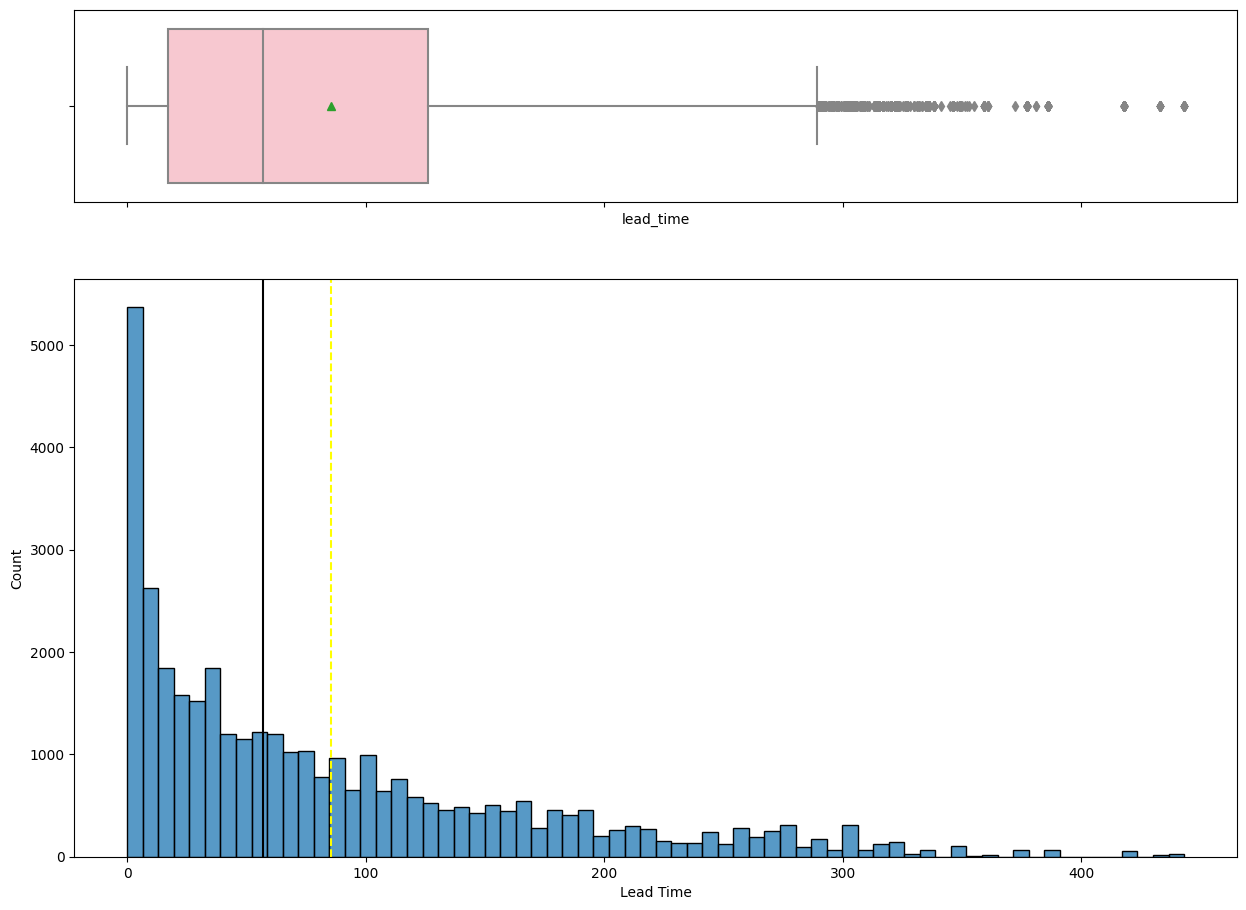

In [14]:
# draw combined histogram and boxplot
histogram_boxplot(data, 'lead_time')

# label x axis
plt.xlabel('Lead Time');

####Observations
* Lead time shows a right-skewed distribution with outliers on one side.

###Observations on Average Price Per Room

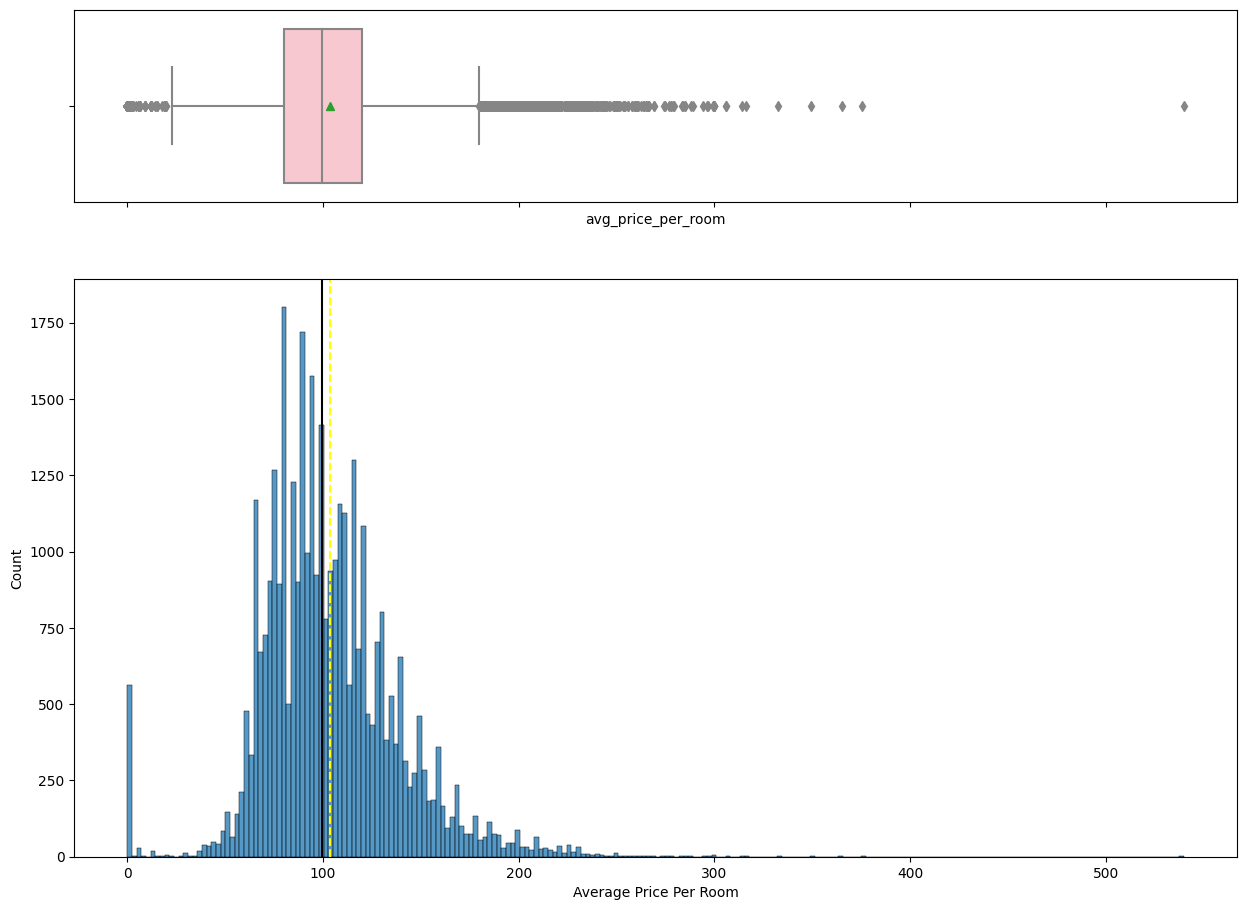

In [15]:
# draw combined histogram and boxplot
histogram_boxplot(data, 'avg_price_per_room')

# label x axis
plt.xlabel('Average Price Per Room');

####Observations 
* The average price per room has a right-skewed distribution with outliers on both sides. 
* We will check for $0 values.

In [16]:
# check for values of 0 for avg_price_per_room
data[data['avg_price_per_room'] == 0]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
63                1               0                     0                  1   
145               1               0                     0                  2   
209               1               0                     0                  0   
266               1               0                     0                  2   
267               1               0                     2                  1   
...             ...             ...                   ...                ...   
35983             1               0                     0                  1   
36080             1               0                     1                  1   
36114             1               0                     0                  1   
36217             2               0                     2                  1   
36250             1               0                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
63          Meal Plan 1                           0        Room_Type 1   
145         Meal Plan 1                           0        Room_Type 1   
209         Meal Plan 1                           0        Room_Type 1   
266         Meal Plan 1                           0        Room_Type 1   
267         Meal Plan 1                           0        Room_Type 1   
...                 ...                         ...                ...   
35983       Meal Plan 1                           0        Room_Type 7   
36080       Meal Plan 1                           0        Room_Type 7   
36114       Meal Plan 1                           0        Room_Type 1   
36217       Meal Plan 1                           0        Room_Type 2   
36250       Meal Plan 2                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
63             2          2017              9            10   
145           13          2018              6             1   
209            4          2018              2            27   
266            1          2017              8            12   
267            4          2017              8            23   
...          ...           ...            ...           ...   
35983          0          2018              6             7   
36080          0          2018              3            21   
36114          1          2018              3             2   
36217          3          2017              8             9   
36250          6          2017             12            10   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
63          Complementary               0                             0   
145         Complementary               1                             3   
209         Complementary               0                             0   
266         Complementary               1                             0   
267         Complementary               0                             0   
...                   ...             ...                           ...   
35983       Complementary               1                             4   
36080       Complementary               1                             3   
36114              Online               0                             0   
36217              Online               0                             0   
36250              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
63                                        0             0.00000   
145                                       5             0.00000   
209                                       0             0.00000   
266                                       1             0.00000   
267                                       0             0.00000   
...                                     ...                 ...   
35983                         

####Observations
* 545 entries have the average price per room at $0.
* We need to check if this is a mistake or intentional. We can use market segment type to do this.

In [17]:
# return counts for all rooms costing $0 broken down by market_segment_type
data.loc[data['avg_price_per_room'] == 0, 'market_segment_type'].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

####Observations
* 354 rooms are complementary and not an error at $0.

* 191 online bookings should not have an average price of $0. 
* We will calculate the value of the upper whisker and assign the missing values. 

In [18]:
# calculate 25th quantile
Q1 = data['avg_price_per_room'].quantile(0.25)

# calculate 75th quantile
Q3 = data['avg_price_per_room'].quantile(0.75)

# calculate IQR
IQR = Q3 - Q1

# calculate upper whisker
upper_whisker = Q3 + 1.5 * IQR

upper_whisker

179.55

####Observations
* The value of the upper whisker is 179.55.

In [19]:
# assign outliers value of upper whisker
data.loc[data['avg_price_per_room'] >= 500, 'avg_price_per_room'] = upper_whisker

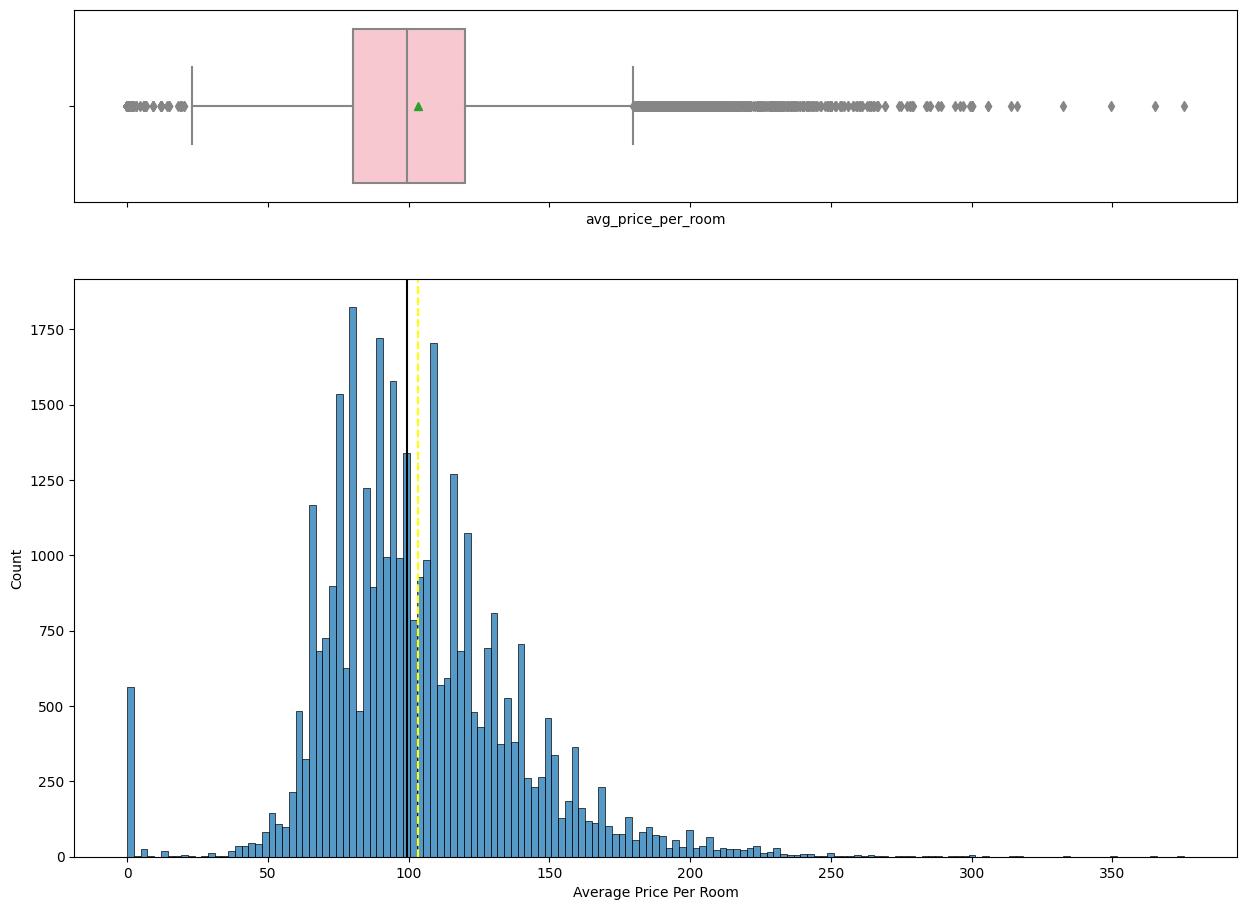

In [20]:
# redraw combined histogram and boxplot
histogram_boxplot(data, 'avg_price_per_room')

# label x axis
plt.xlabel('Average Price Per Room');

####Observation
* Average price per room still shows a right-skewed distribution with outliers on both sides, but the right outliers are more evenly distributed.

###Observations on Previous Cancellations

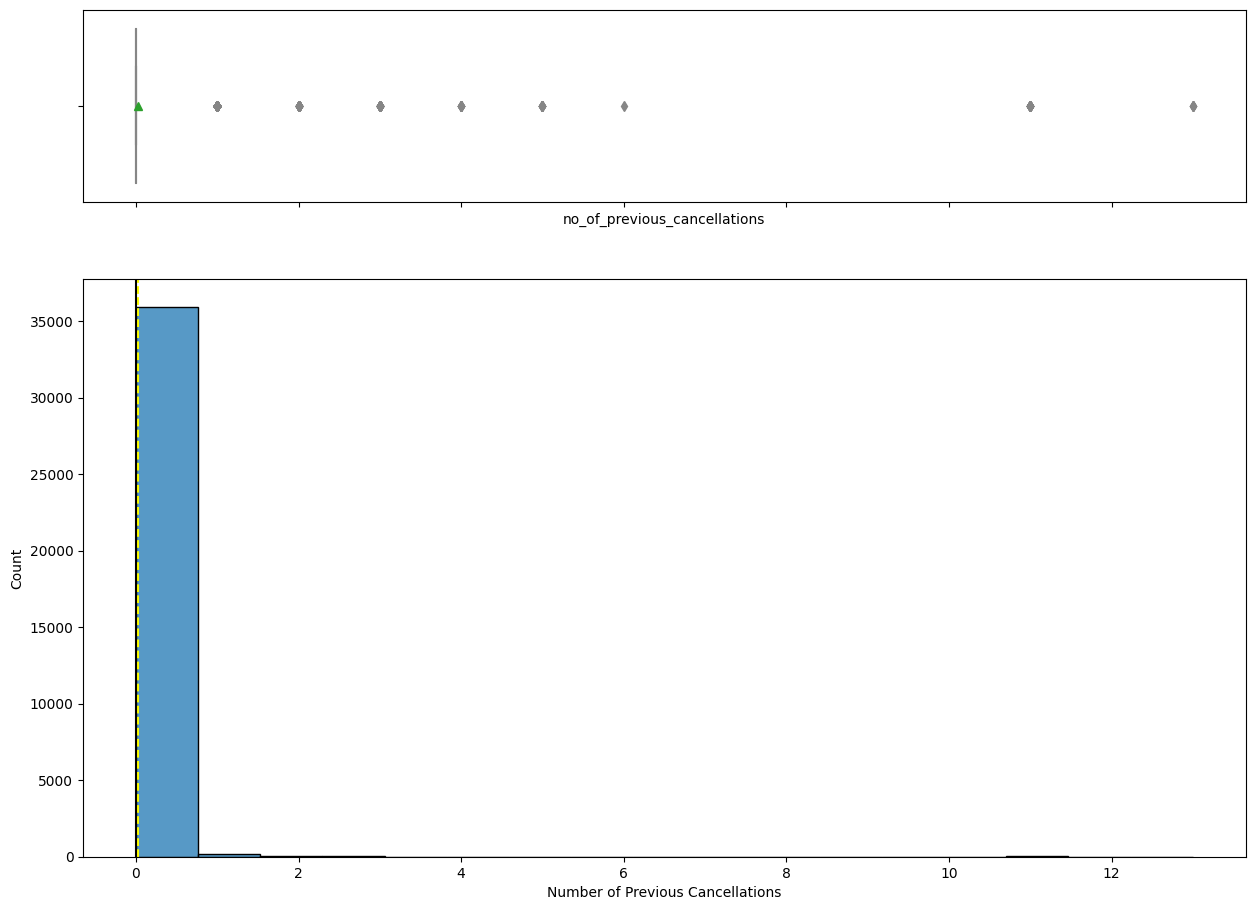

In [21]:
# draw combined histogram and boxplot
histogram_boxplot(data, 'no_of_previous_cancellations')

# label x axis
plt.xlabel('Number of Previous Cancellations');

####Observations
* Number of previous cancellations has a right-skewed distribution with outliers on one side.

###Observations on Previous Booking Not Canceled

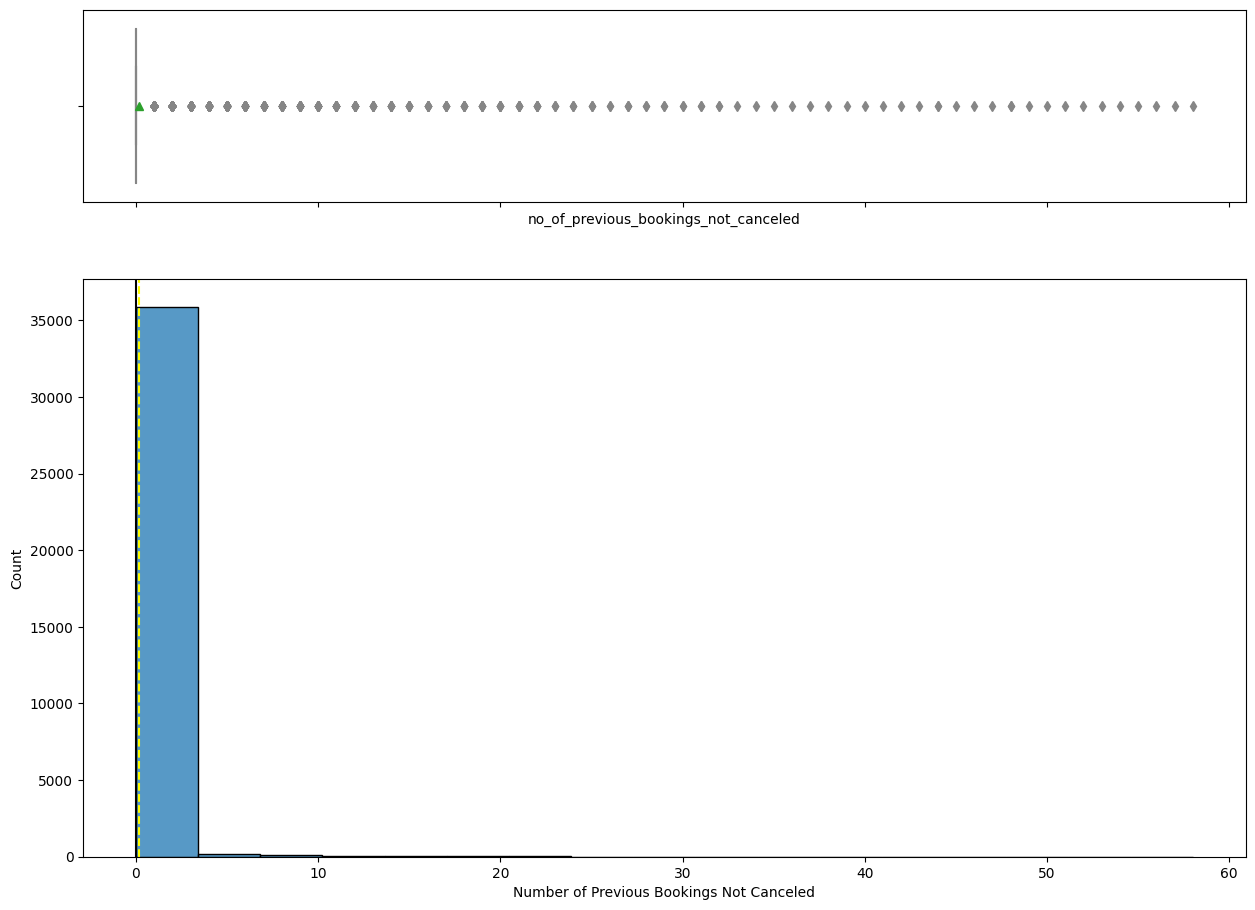

In [22]:
# draw combined histogram and boxplot
histogram_boxplot(data, 'no_of_previous_bookings_not_canceled')

# label x axis
plt.xlabel('Number of Previous Bookings Not Canceled');

####Observations
* Number of previous bookings not cancelled has a right-skewed distribution with outliers to one side.

In [23]:
# define function to create labeled barplot
def labeled_barplot(data, feature, perc = False, n = None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 2, 6))
    else:
        plt.figure(figsize = (n + 2, 6))

    # rotate x labels 45 degrees and set font size
    plt.xticks(rotation = 45, fontsize = 15)
    ax = sns.countplot(data = data, x = feature, palette = 'Paired', order = data[feature].value_counts().index[:n],)

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(100 * p.get_height() / total)  # percentage of each class of category
        else:
            label = p.get_height()  # count of each level of category

        x = p.get_x() + p.get_width() / 2  # plot width
        y = p.get_height()  # plot height

        ax.annotate(
            label,
            (x, y), ha = 'center', va = 'center', size = 12, xytext = (0, 5), textcoords = 'offset points',)  # annotate percentage

    plt.show()

###Observations on Number of Children

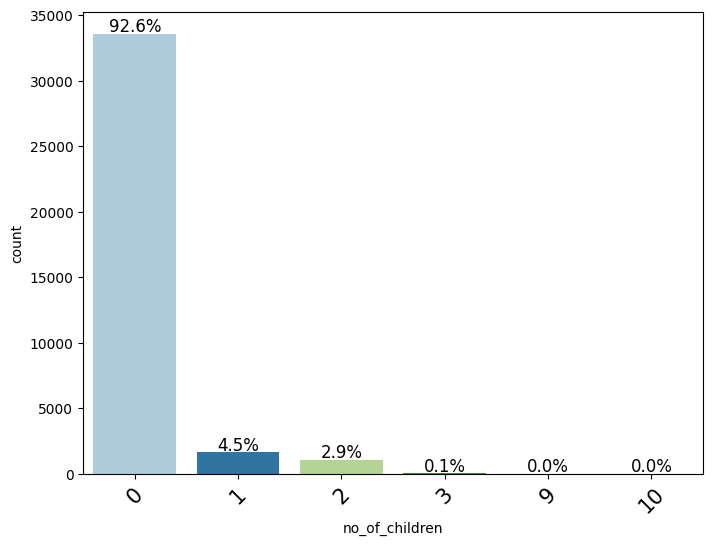

In [24]:
# draw labeled barplot
labeled_barplot(data, 'no_of_children', perc = True);

####Observations
* 92.6% of bookings are adults only. 
* Both 9 and 10 children seem to be an error. The max number of children is 3. 
* We will replace 9 and 10 entries with the max 3. 

In [25]:
# replace 9 and 10 children with 3
data['no_of_children'] = data['no_of_children'].replace([9, 10], 3)

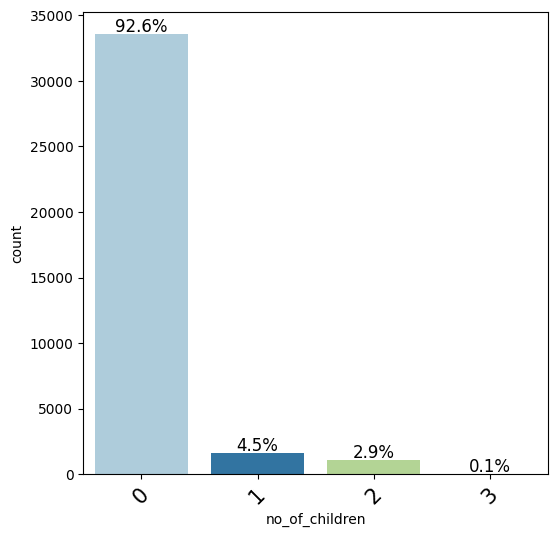

In [26]:
# redraw labeled barplot
labeled_barplot(data, 'no_of_children', perc = True);

####Observations
* Values 9 and 10 have been removed. 
* Only 0.1% of bookings have 3 children. 

###Observations on Number of Adults

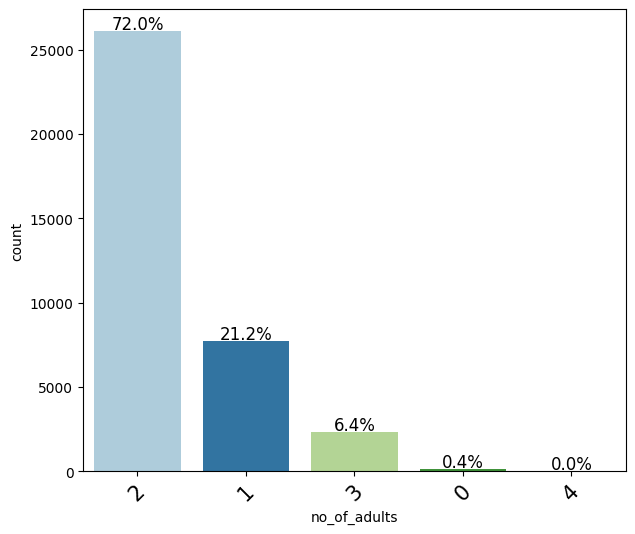

In [27]:
# draw labeled barplot
labeled_barplot(data, 'no_of_adults', perc = True);

####Observations
* 72% of all bookings have 2 adults.

###Observations on Number of Weekend Nights


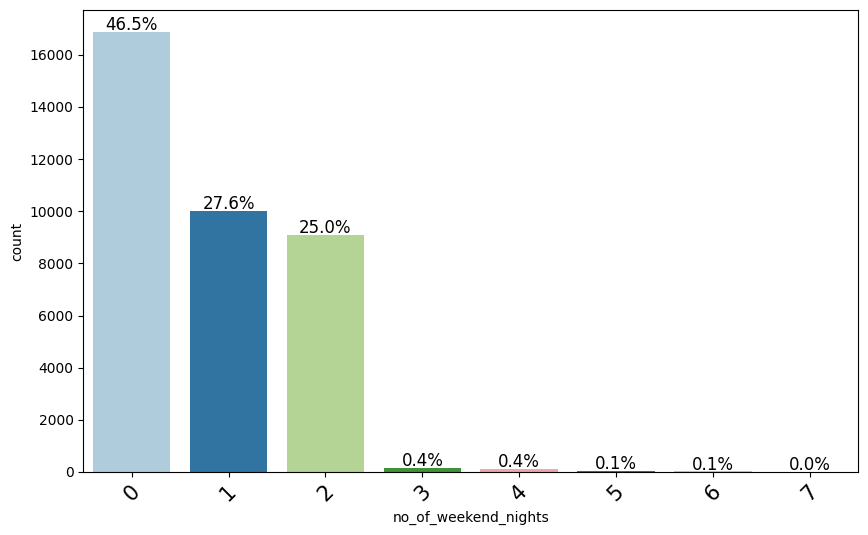

In [28]:
# draw labeled barplot
labeled_barplot(data, 'no_of_weekend_nights', perc = True);

####Observations
* 46.5% of bookings have no weekend nights. This is not surprising since there are more week days then weekend days.
* These trips could be business related. 


###Observations on Number of Week Nights

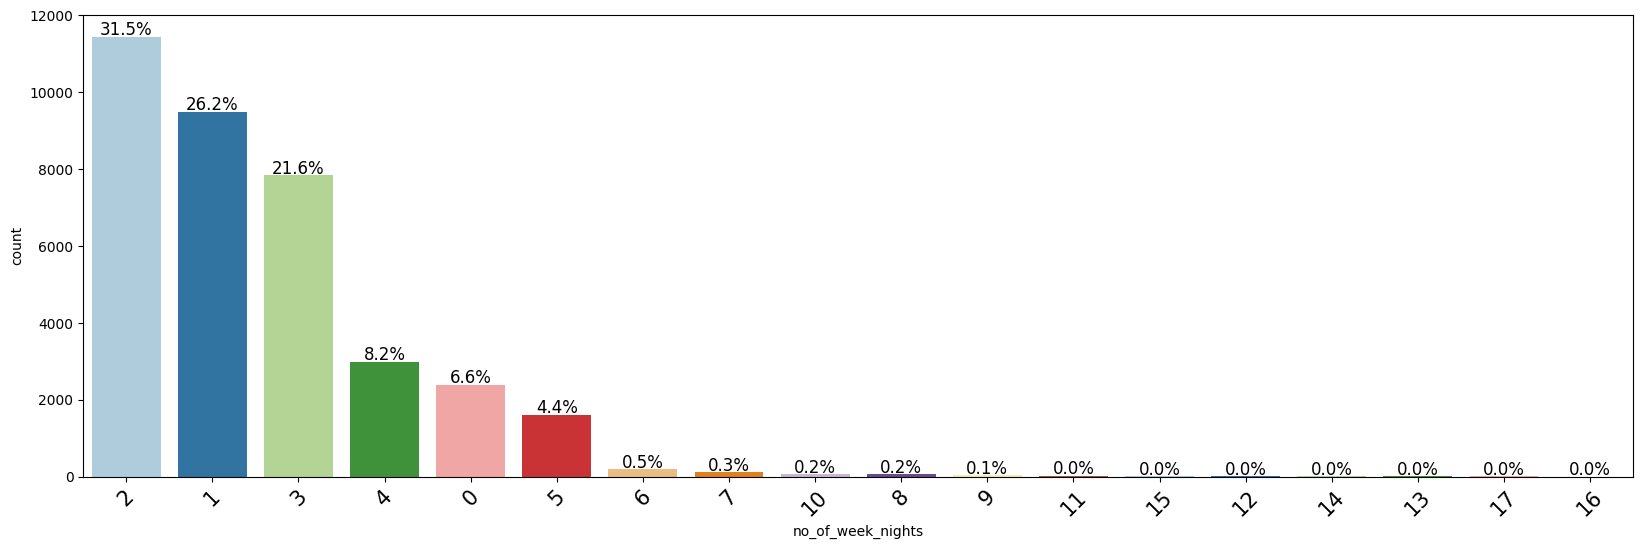

In [29]:
# draw labeled barplot
labeled_barplot(data, 'no_of_week_nights', perc = True);

####Observations
* 31.5% of bookings have 2 week nights, followed closely by 1 week night at 26.2% of bookings.

###Observations on Reserved Room Type

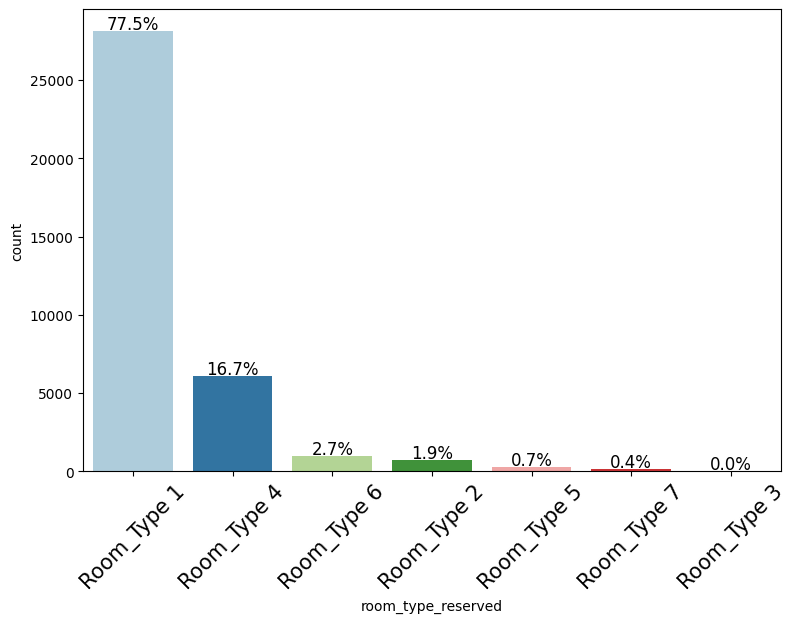

In [30]:
# draw labeled barplot
labeled_barplot(data, 'room_type_reserved', perc = True);

####Observations
* 77.5% of guests reserve Room Type 1.
* Only 0.4% of guests reserve Room Type 7.

###Observations on Required Car Parking Space

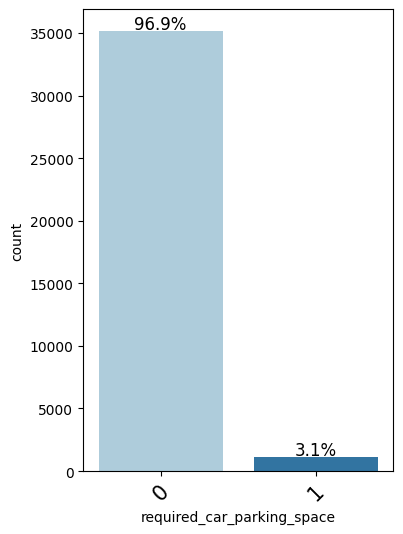

In [31]:
# draw labeled barplot
# 0 = no and 1 = yes
labeled_barplot(data, 'required_car_parking_space', perc = True);

####Observations
* 96.9% of guests do not require a car parking space.
* This signifies that most guests travel without a vehicle, so there is an opportunity for airport advertising to increase this market segment.

####Observations on Type of Meal Plan

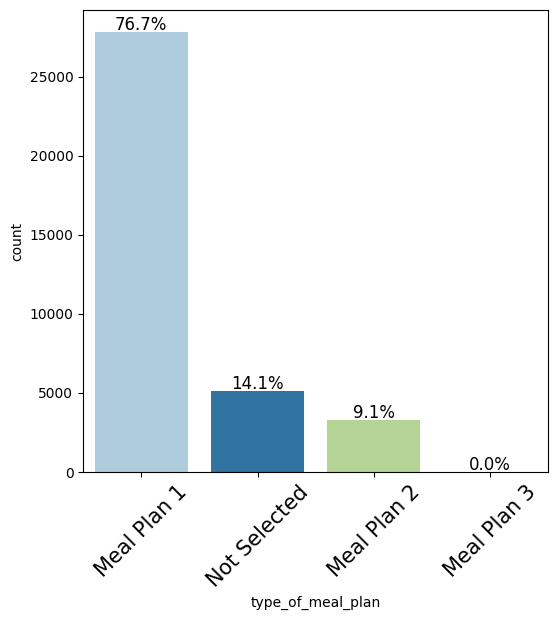

In [32]:
# draw labeled barplot
labeled_barplot(data, 'type_of_meal_plan', perc = True);

####Observations
* 76.7% of guests select Meal Plan 1.
* Only 9.1% of guests select Meal Plan 2.

### Observations on Arrival Month

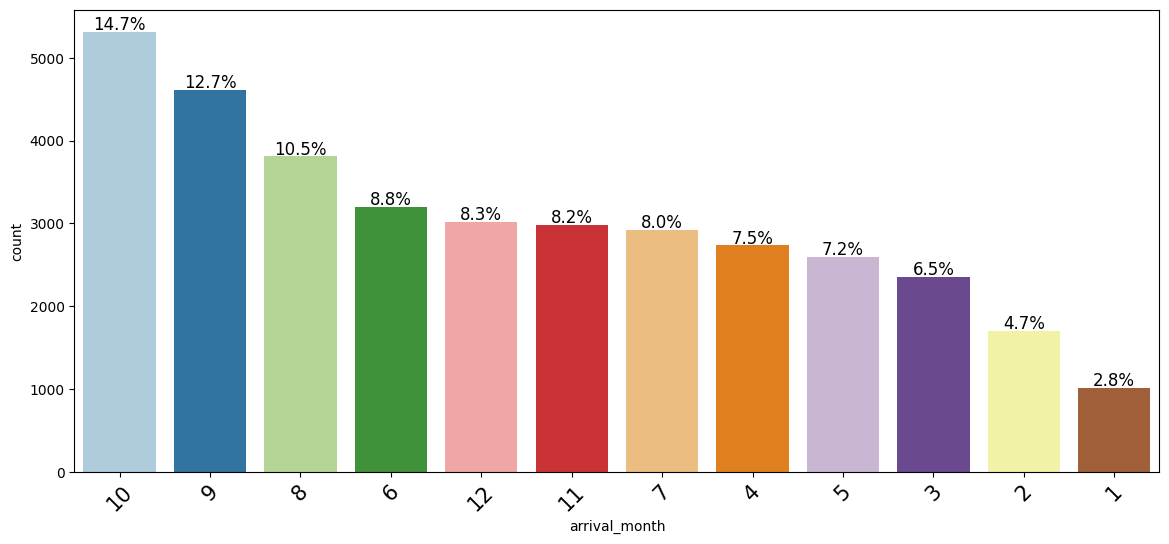

In [33]:
# draw labeled barplot
labeled_barplot(data, 'arrival_month', perc = True);

####Observations
* 14.7% of guests arrive in October, followed closely by 12.7% of guests arriving in September. Fall is a popular arrival period.

###Observations on Market Segment Type

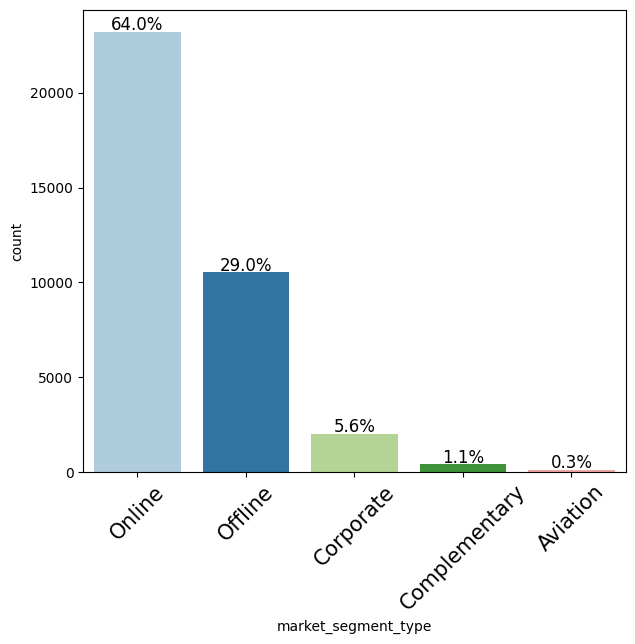

In [34]:
# draw labeled barplot
labeled_barplot(data, 'market_segment_type', perc = True);

####Observations
* 64% of guests book rooms online.
* 1.1% of bookings are free and complementary.
* Only 0.3% of bookings are done through airports.

###Observations on Booking Status

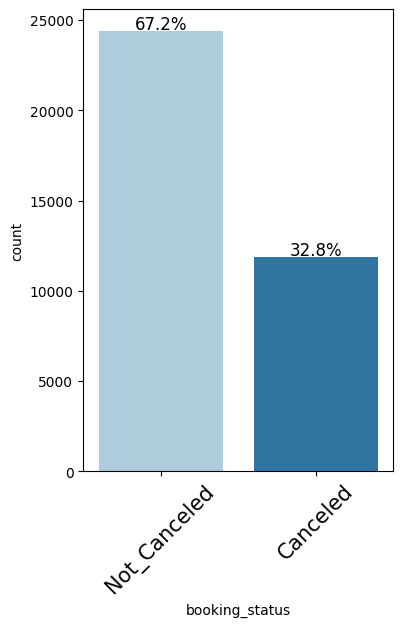

In [35]:
# draw labeled barplot
labeled_barplot(data, 'booking_status', perc = True);

####Observations
* 67.2% of booking are not canceled, while 32.8% of bookings canceled.

###Observations on Number of Special Requests

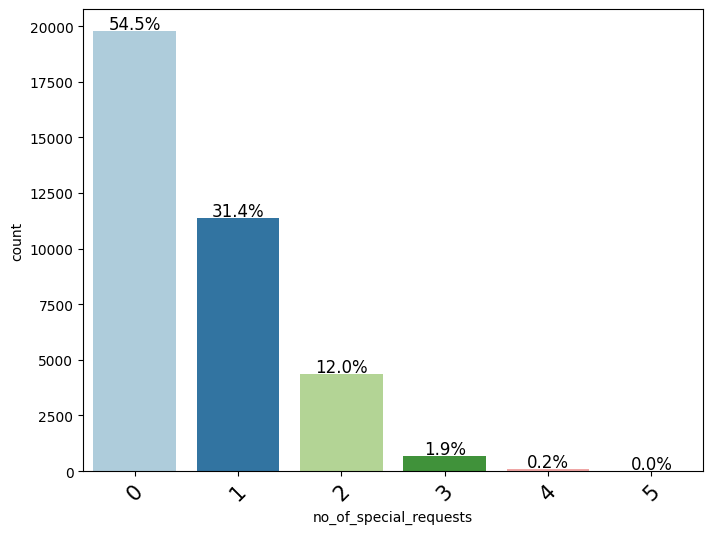

In [36]:
# draw labeled barplot
labeled_barplot(data, 'no_of_special_requests', perc = True);

####Observations
* 54.5% of bookings do not make special requests.
* Only 0.2% of bookings make 4 special requests. 

#Bivariate Analysis

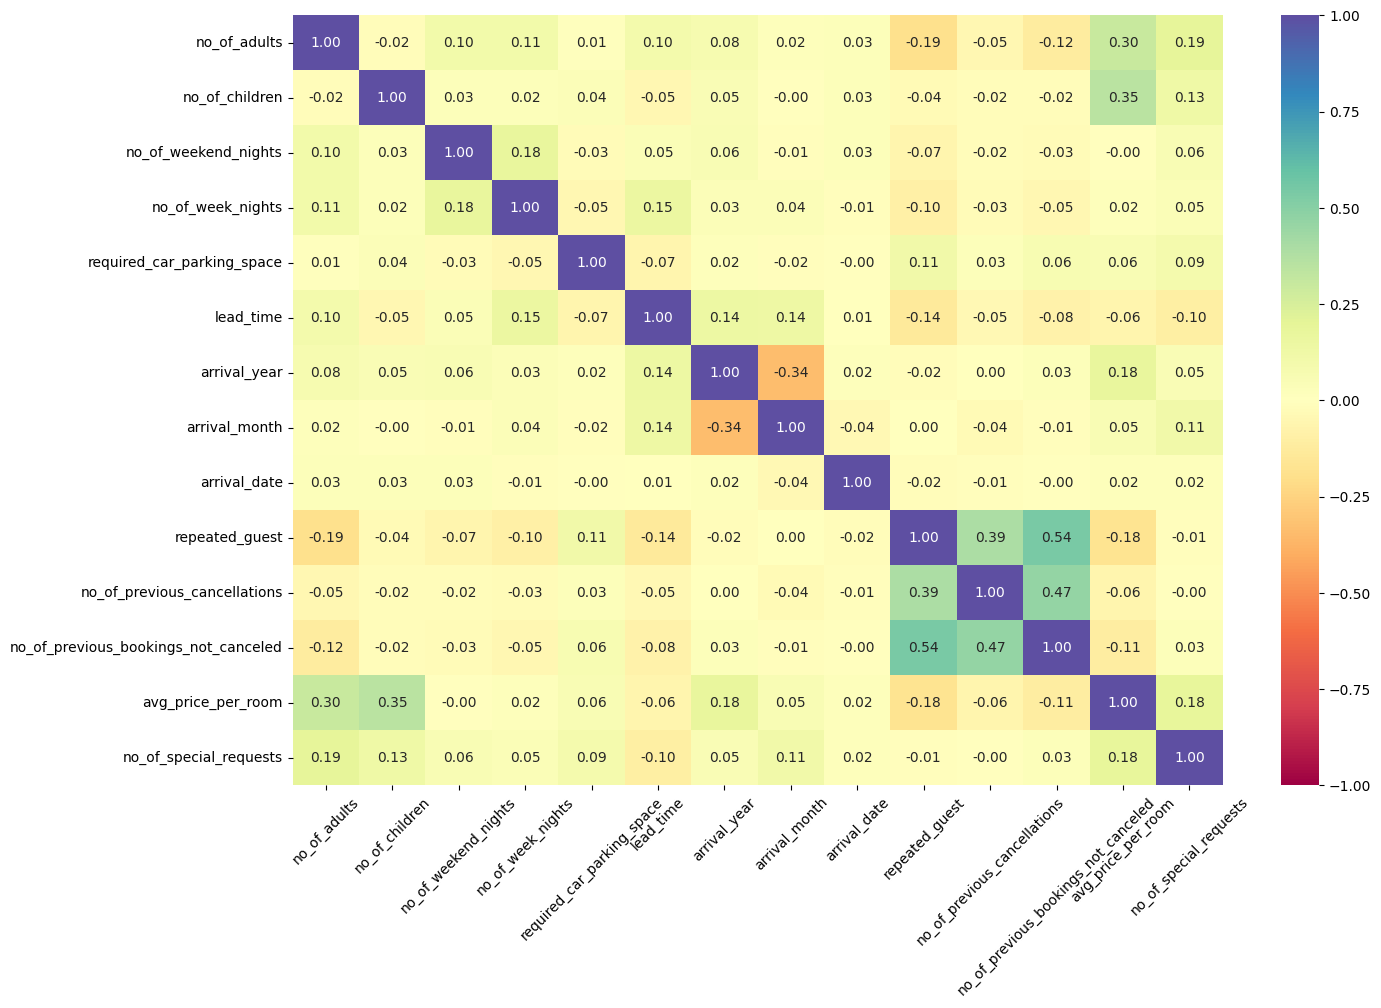

In [37]:
# draw correlation heatmap of numerical columns
cols = data.select_dtypes(include = np.number).columns.tolist()

# set figure size
plt.figure(figsize=(15, 10))

# draw heatmap
sns.heatmap(data[cols].corr(), annot = True, vmin = -1, vmax = 1, fmt = '.2f', cmap = 'Spectral');

# rotate x labels 45 degrees and set font size to 10
plt.xticks(rotation = 45, fontsize = 10);


####Observations
* Repeat guest and number of previous bookings not canceled have a slight positive correlation. 
* Repeat guest and number of previous cancellations also has a slight positive correlation. 
* Average price per room and number of children have a positive correlation.
* Average price per room and number of adults have a positive correlation.

In [38]:
# create function to plot distributions with respect to target
# used to identify potential patterns and relationships 
def wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize = (12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title('Distribution of Target for Target = ' + str(target_uniq[0]))
    
    # draw histplot
    sns.histplot(data = data[data[target] == target_uniq[0]],
        x = predictor, kde = True, ax = axs[0, 0], color = 'teal', stat = 'density',)

    axs[0, 1].set_title('Distribution of Target for Target =' + str(target_uniq[1]))
    
    # draw histplot
    sns.histplot(data = data[data[target] == target_uniq[1]],
        x = predictor, kde = True, ax = axs[0, 1], color = 'orange', stat = 'density',)

    axs[1, 0].set_title('Boxplot W.R.T Target')
    
    # draw boxplot
    sns.boxplot(data = data, x = target, y = predictor, ax = axs[1, 0], palette = 'gist_rainbow')

    axs[1, 1].set_title('Boxplot (without outliers) W.R.T Target')
   
   # draw boxplot
    sns.boxplot(data = data, x = target, y = predictor, ax = axs[1, 1], showfliers = False, palette = 'gist_rainbow',)

    plt.tight_layout()
    plt.show()

In [39]:
# create function to draw stacked barplots
# good for showing how the composition of a group changes across categories
def stacked_barplot(data, predictor, target):
   
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(by = sorter, ascending = False)
    print(tab1)
    print('-' * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = 'index').sort_values(by = sorter, ascending = False)
    tab.plot(kind='bar', stacked=True, figsize=(count + 5, 5))
    
    # show legend
    plt.legend(loc = 'lower left', frameon = False,)
    plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
    
    plt.show()

## Q1: What are the busiest months in the hotel?

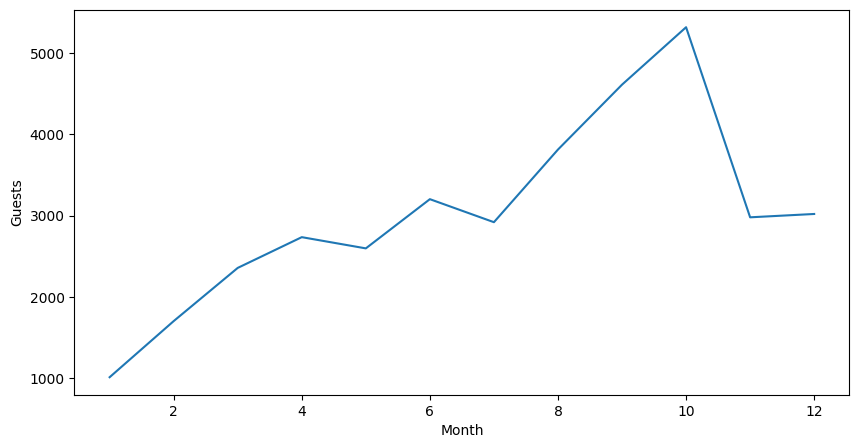

In [40]:
# group data by arrival month and extract count
monthly_data = data.groupby(['arrival_month'])['booking_status'].count()

# create dataframe with months and count
monthly_data = pd.DataFrame(
    {'Month': list(monthly_data.index), 'Guests': list(monthly_data.values)})

# set figure size
plt.figure(figsize = (10, 5))

# draw a lineplot to plot the trend
sns.lineplot(data = monthly_data, x='Month', y = 'Guests');

####Observations
* Fall months are the busiest months of the year. 
* The number of guests start to peak in June, with the most guests in October.

##Q2: Which market segment do most of the guests come from?

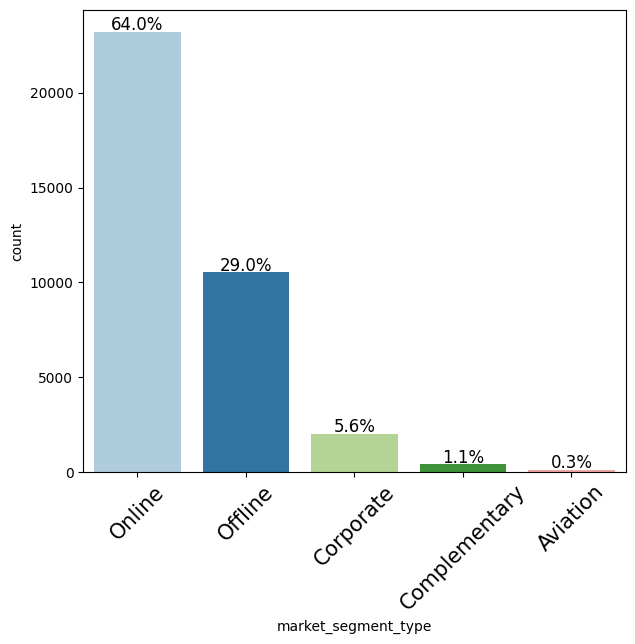

In [41]:
# draw labeled barplot
labeled_barplot(data, 'market_segment_type', perc = True)

####Observations
* 64% of guests come from the online market.

##Q3: Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

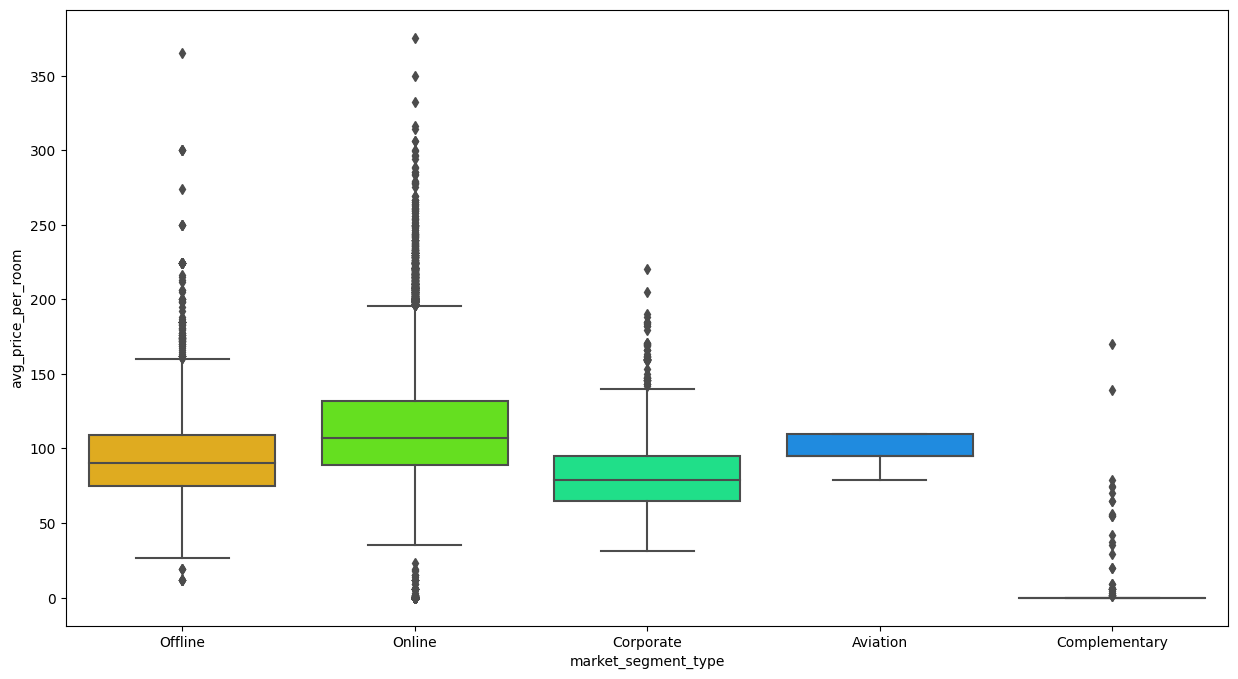

In [42]:
# set figure size
plt.figure(figsize=(15, 8))

# draw boxplot
sns.boxplot(data = data, x = 'market_segment_type', y = 'avg_price_per_room', palette ='gist_rainbow');

####Observations
* Online room prices are higher on average than other segments.
* The corporate segment has lower than average pricing. This is to be expected considering bulk deals and repeat bookings are common.

##Q4: How does booking status vary across market segments?

In [43]:
# encode canceled bookings as 1 and not canceled bookings as 0
data['booking_status'] = data['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


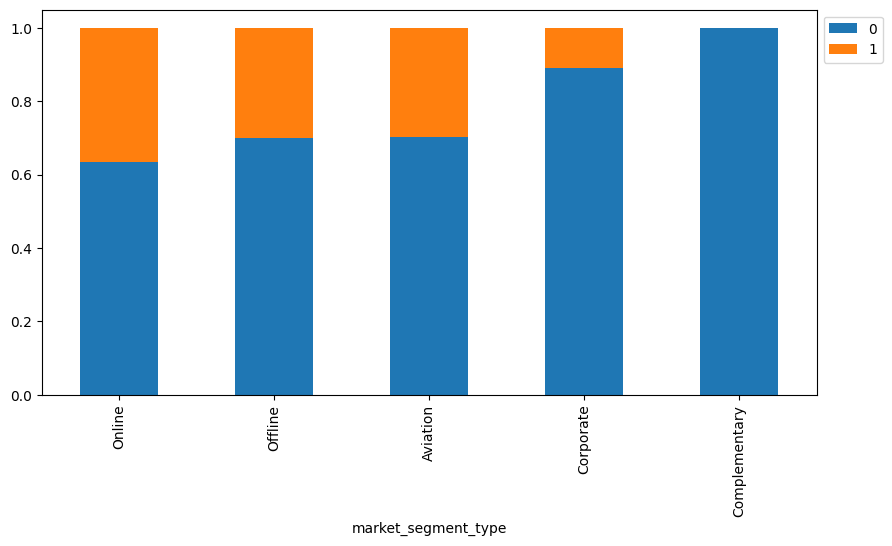

In [44]:
# draw stacked barplot
# canceled bookings = 1 and not canceled bookings = 0
stacked_barplot(data, 'market_segment_type', 'booking_status')

####Observations
* 14,739 not canceled bookings come from the online segment.
* Only 125 bookings come from the aviation segment, and of those, 37 canceled.
* 391 bookings were free and complementary. No complementary bookings cancelled.
* Corporate bookings also show a low cancellation rate.

##Q5: What percentage of bookings are canceled?


booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


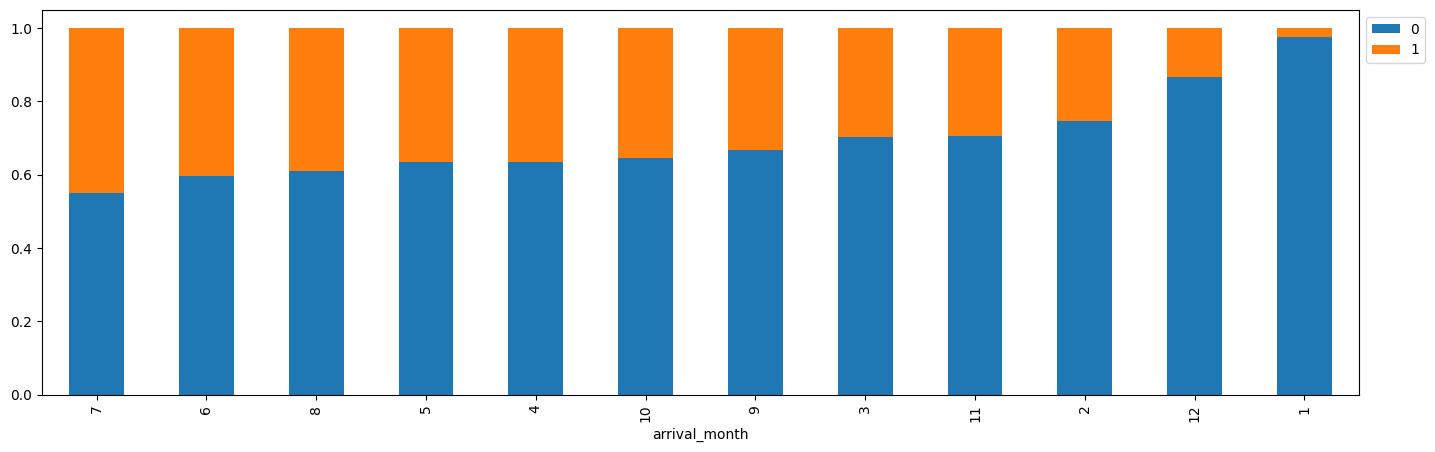

In [45]:
# draw stacked barplot
# canceled bookings = 1 and not canceled bookings = 0
stacked_barplot(data, 'arrival_month', 'booking_status')

In [46]:
# print percentage of booking canceled
print((11885 / 36275) * 100)

32.76361130254997


####Observations 
* 32.76% of bookings cancel. 
* July has the highest cancellation rate. 
* January has the lowest cancellation rate.


##Q6: Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?


booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


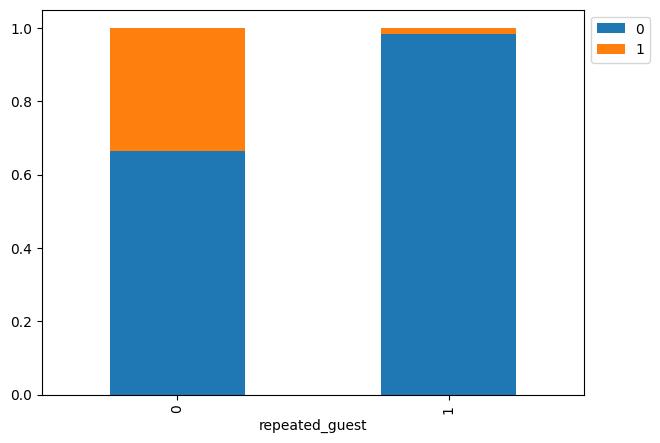

In [47]:
# draw stacked barplot
# canceled bookings = 1 and not canceled bookings = 0
# repeat guest yes = 1 and repeat guest no = 0
stacked_barplot(data, 'repeated_guest', 'booking_status')

In [48]:
# print percentage of repeat guests that cancel
print((16 / 930) * 100)

1.7204301075268817


In [49]:
# print percentage of guests that are repeat guests
print((930 / 36275) * 100)

2.563749138525155


####Observations
* Ony 1.72% of repeat guests cancel their bookings. 
* Only 2.56% of guests are repeat guests.


##Q7: Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


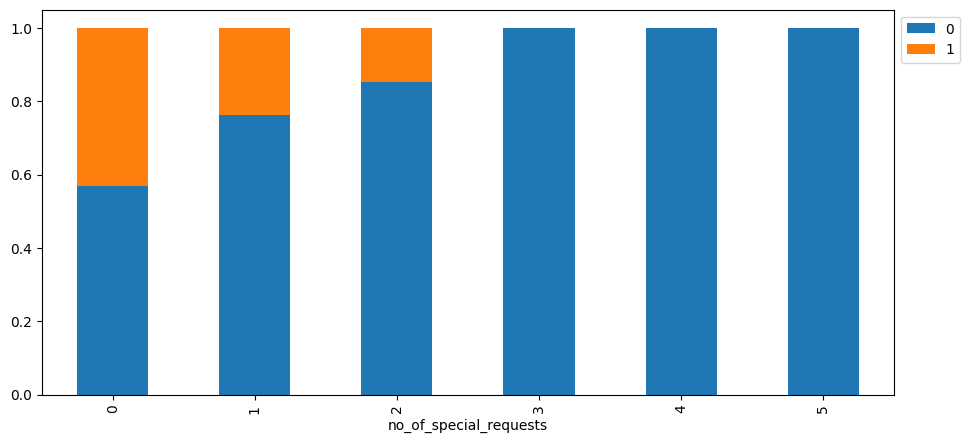

In [50]:
# draw stacked barplot
# canceled bookings = 1 and not canceled bookings = 0
stacked_barplot(data, 'no_of_special_requests', 'booking_status')

####Observations
* Guests with 3 or more special requests showed no booking cancellations. 
* 8,545 guests with no special requests canceled bookings. 
* The higher the number of special requests, the less likely a guest cancels their booking. 

##Q8: Do special requests impact price?

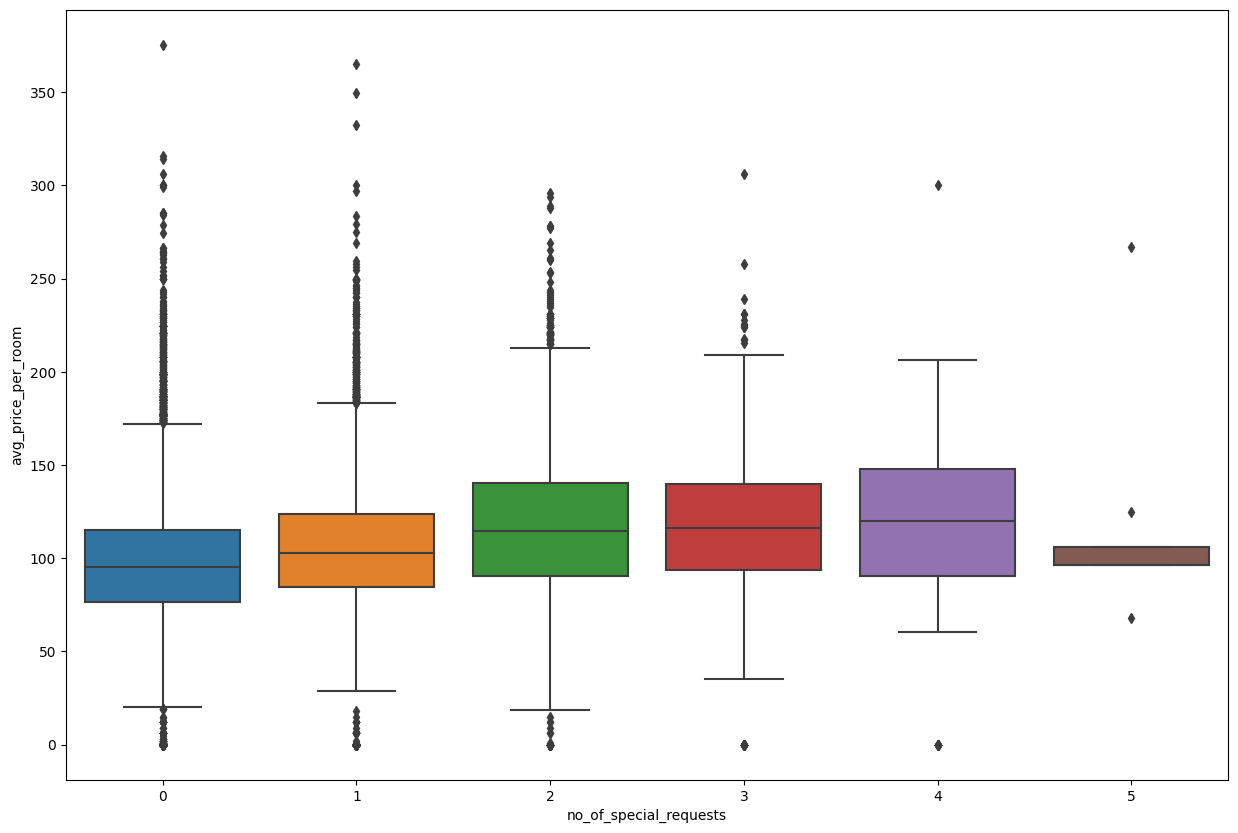

In [51]:
# set figure size
plt.figure(figsize=(15, 10))

# draw boxplot
sns.boxplot(data, x = 'no_of_special_requests', y = 'avg_price_per_room');

####Observations
* The average price per room increases slightly as the number of requests increases, signifying a mild positive correlation.

##Q9: Analyze the positive correlation between booking status and the average price per room.

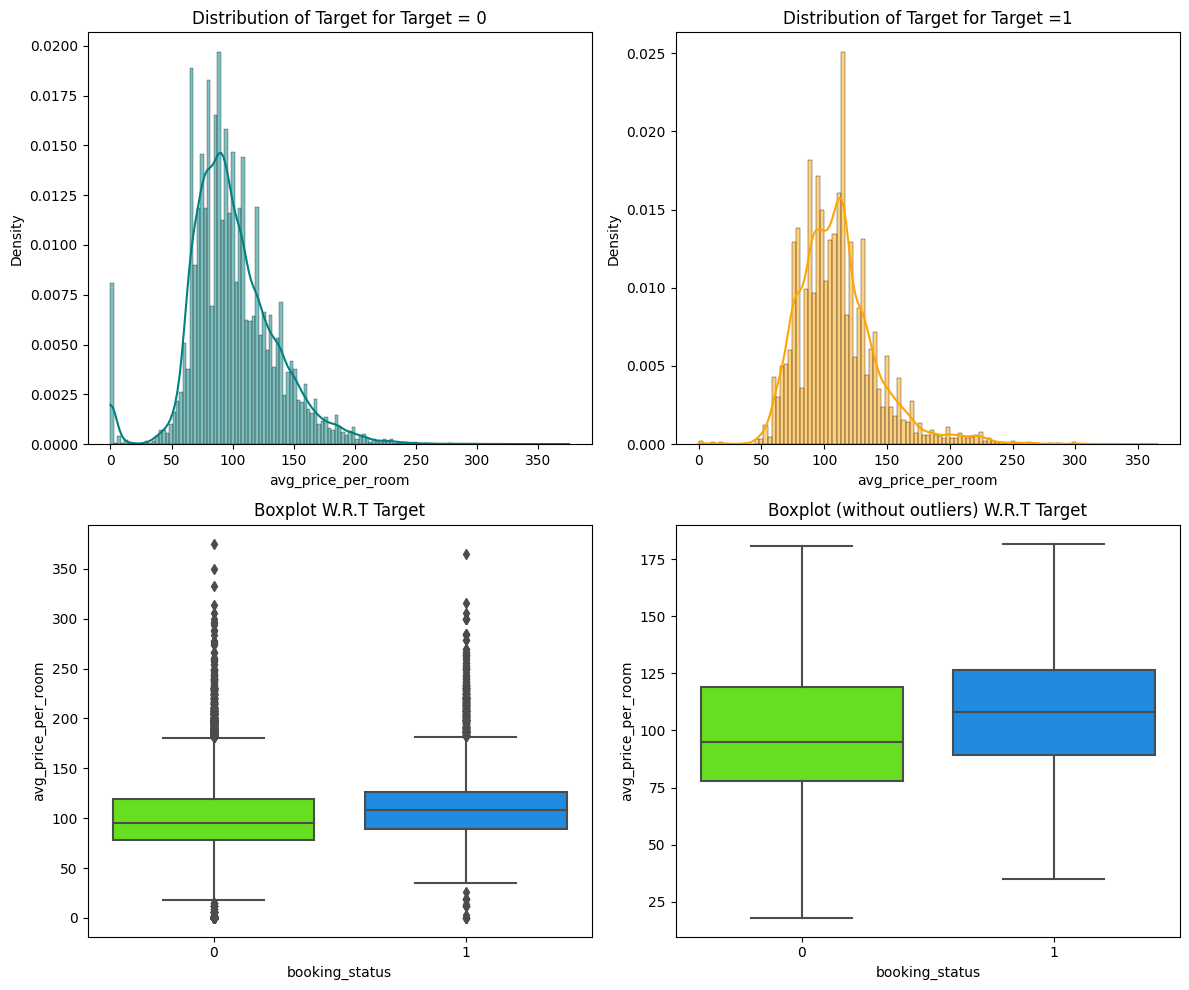

In [52]:
# draw with respect to target plots
# canceled bookings = 1 and not canceled bookings = 0
wrt_target(data, 'avg_price_per_room', 'booking_status')

####Observations
* There is not much difference between the average room price for canceled or non-canceled bookings. 
* Canceled bookings show a slightly higher price. This could signifiy a cancellation fee. 
* There are outliers in both distributions. 

##Q10: Analyze the positive correlation between booking status and lead time.

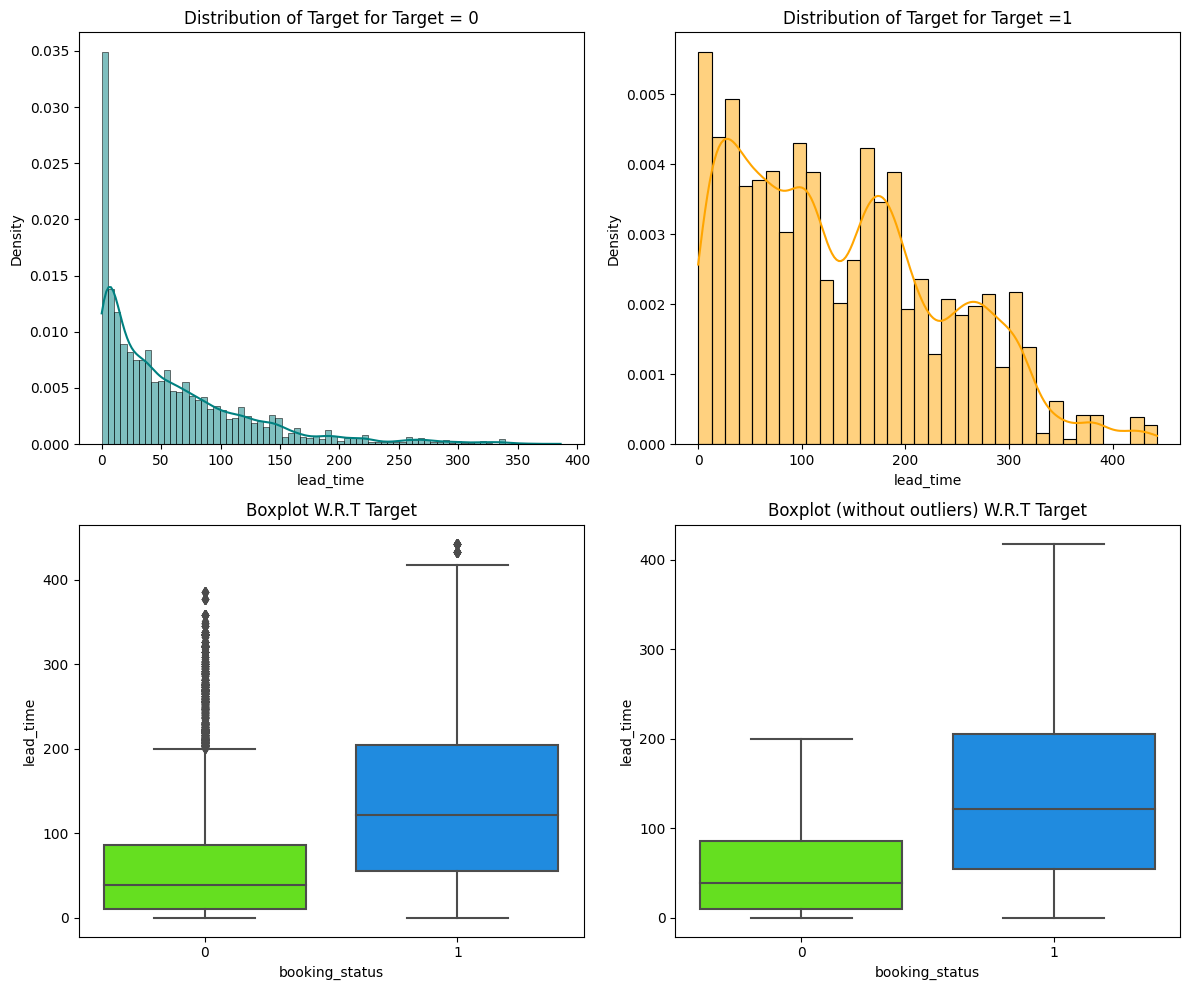

In [53]:
# draw with repsect to target plots
# canceled bookings = 1 and not canceled bookings = 0
wrt_target(data, 'lead_time', 'booking_status')

####Observations
* Guests with lower lead times are more likely to cancel than those with higher lead times.
* There are outliers in both distributions.


##Q11: What is the busiest month in the hotel?

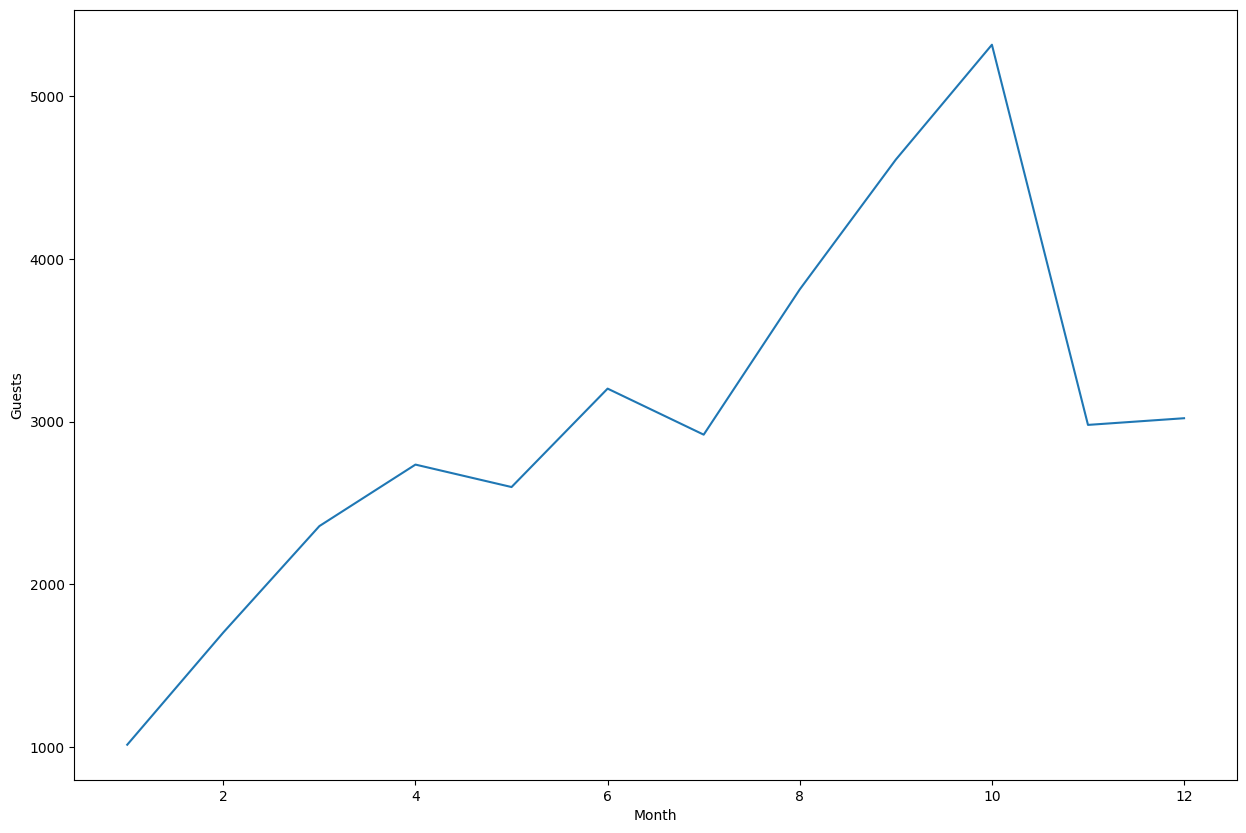

In [54]:
# group data on arrival month and extract booking count
monthly_data = data.groupby(['arrival_month'])['booking_status'].count()

# create data frame with months and count
monthly_data = pd.DataFrame({'Month': list(monthly_data.index), 'Guests': list(monthly_data.values)})

# set figure size
plt.figure(figsize=(15, 10))

# plot the trend over different months
sns.lineplot(data = monthly_data, x = 'Month', y = 'Guests');

####Observations
* October is the busiest month for the hotel.


##Q12: How does the price vary across different months?

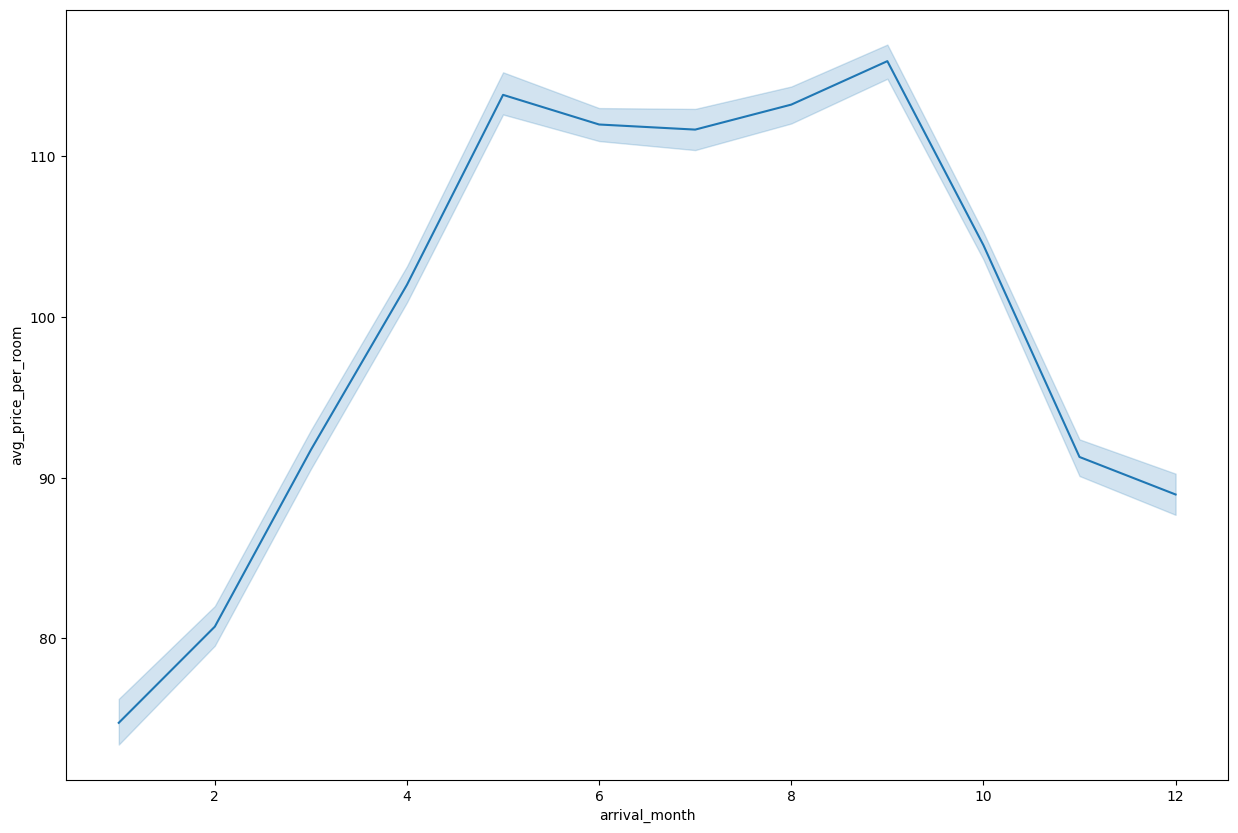

In [55]:
# set figure size
plt.figure(figsize = (15, 10))

# draw lineplot
sns.lineplot(data, x = 'arrival_month', y = 'avg_price_per_room');

####Observations
* The average price per room increases during the hotel's busy times between spring and fall and decreases in the off-season during the winter.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

##Outlier Detection

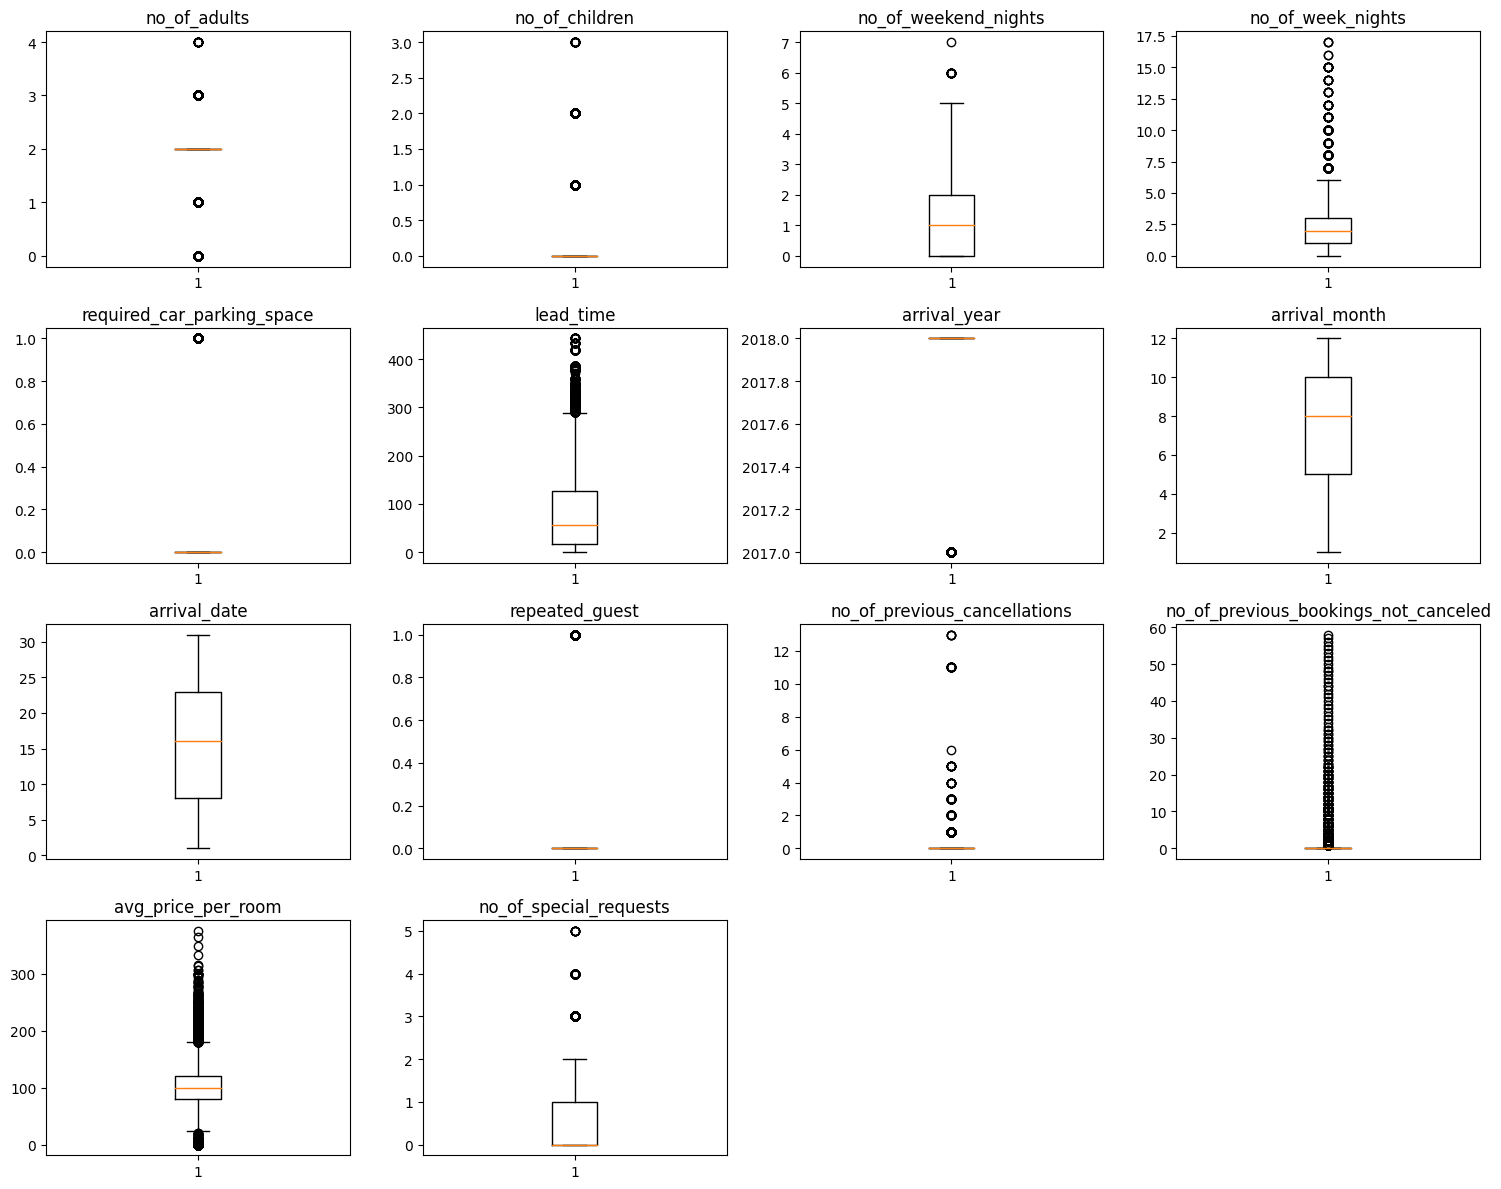

In [56]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# drop booking_status
numeric_columns.remove('booking_status')

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()
  

####Observations
* There are outliers in the data set. 
* The outliers do not need treated, because they are proper values.

##Model Building

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [57]:
# define function to compute metrics to check performance of classification model using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    # check which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold

    # round off above values to get classes
    pred = np.round(pred_temp)

    # compute accuracy
    acc = accuracy_score(target, pred)

    # compute recall
    recall = recall_score(target, pred)

    # compute precision
    precision = precision_score(target, pred)

    # compute F1-score
    f1 = f1_score(target, pred)

    # create dataframe of metrics
    df_perf = pd.DataFrame(
        {'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1': f1,}, index=[0],)

    return df_perf

In [58]:
# define function to plot confusion_matrix of classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold = 0.5):
 
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # set figure size 
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")

    # set labels
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

### Logistic Regression (with statsmodels library)

###Data Preparation for Modeling

We want to predict which bookings will be canceled.
Before we proceed to build a model, we'll have to encode categorical features.
We'll split the data into train and test to be able to evaluate the model that we build on the train data.

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [59]:
# define dependent and independent variables
X = data.drop(['booking_status'], axis = 1)
y = data['booking_status']

# add constant
X = sm.add_constant(X)

# create dummy variables
X = pd.get_dummies(X, drop_first = True)
X.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0 1.00000             2               0                     1   
1 1.00000             2               0                     2   
2 1.00000             1               0                     2   
3 1.00000             2               0                     0   
4 1.00000             2               0                     1   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0                  2                           0        224          2017   
1                  3                           0          5          2018   
2                  1                           0          1          2018   
3                  2                           0        211          2018   
4                  1                           0         48          2018   

   arrival_month  arrival_date  repeated_guest  no_of_previous_cancellations  \
0             10             2               0                             0   
1             11             6               0                             0   
2              2            28               0                             0   
3              5            20               0                             0   
4              4            11               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                       0                              0   
1                       1                              0   
2                       0                              0   
3                       0                              0   
4                       0                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                  0                              0   
1                                  0                              0   
2                                  0                          

In [60]:
# split data using 70:30 ratio for train to test data (70:30 is most common split ratio, 70% knowledge goes to training set and 30% knowledge goes to test set)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [61]:
# check the number of rows in each set
print('The number of rows in the train data set = ', X_train.shape[0])
print('The number of rows in the test data set = ', X_test.shape[0])

The number of rows in the train data set =  25392
The number of rows in the test data set =  10883


In [62]:
# canceled bookings = 1 and not canceled bookings = 0
# print percentage of each class in the training set
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize=True))

# print percentage of each class in the test set
print('Percentage of classes in test set:')
print(y_test.value_counts(normalize=True))


Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


####Observations
* Around 67% of bookings are not canceled and 33% of bookings are canceled as seen in the train set.
* This is preserved in the test set where we see approximately 67% of bookings not canceled and approximately 33% canceled.

## EDA

- It is a good idea to explore the data once again after manipulating it.

##Observations on Lead Time

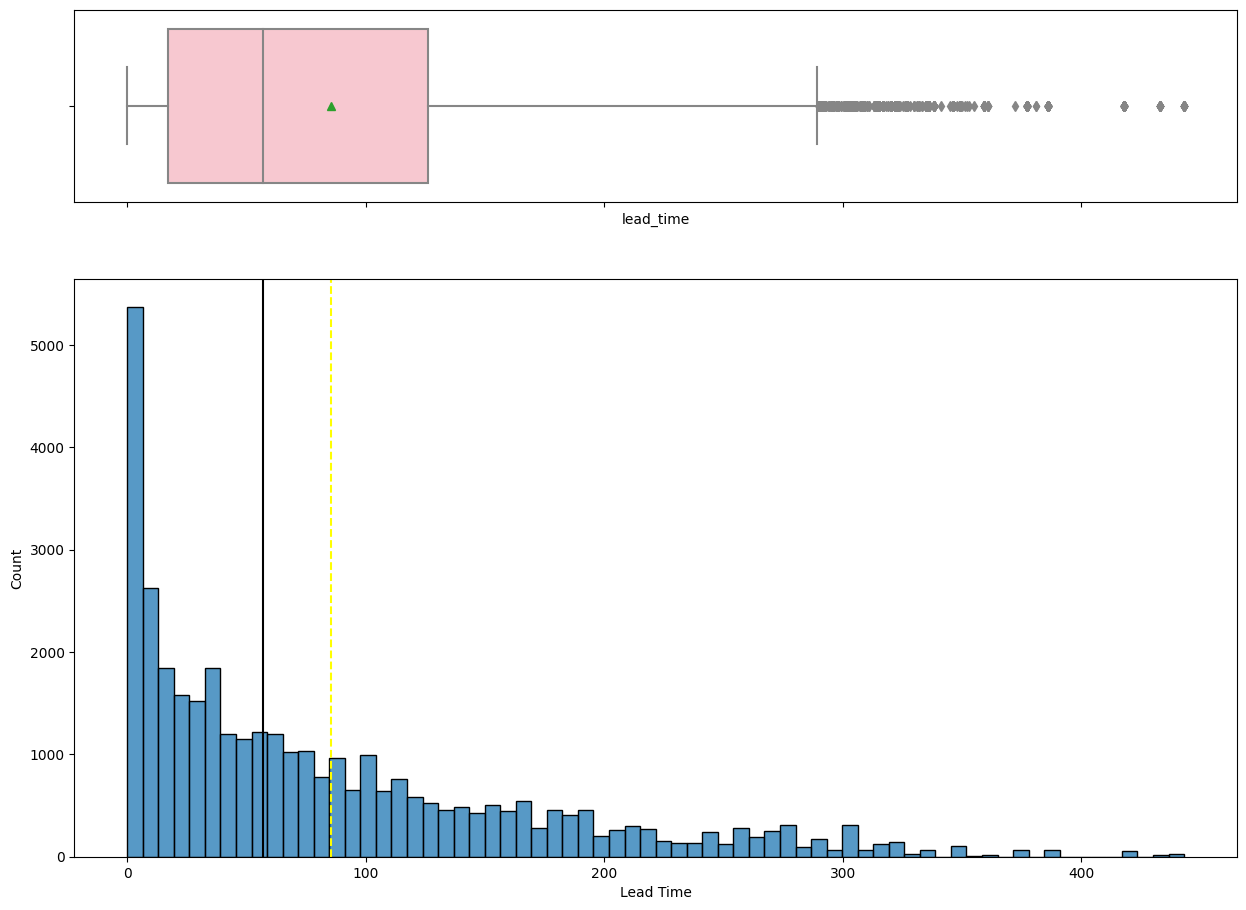

In [63]:
# draw combined histogram and boxplot
histogram_boxplot(data, 'lead_time')

# label x axis
plt.xlabel('Lead Time');

####Observations
* Lead time shows a right-skewed distribution with outliers on one side.

##Observations on Average Price Per Room

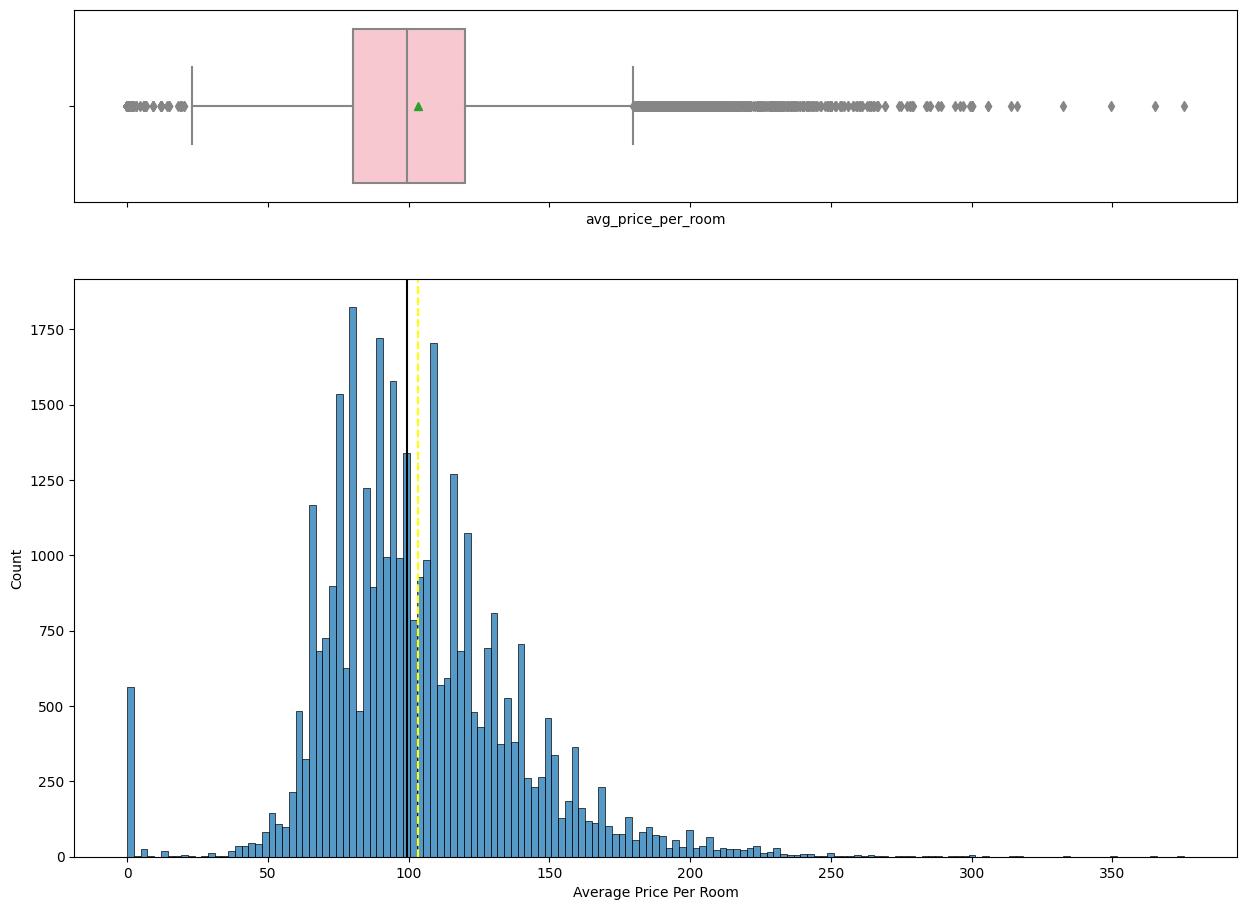

In [64]:
# draw combined histogram and boxplot
histogram_boxplot(data, 'avg_price_per_room')

# label x axis
plt.xlabel('Average Price Per Room');

####Observations
* Average price per room shows a right-skewed distribution with outliers on both sides.

##Observations on Previous Cancellations

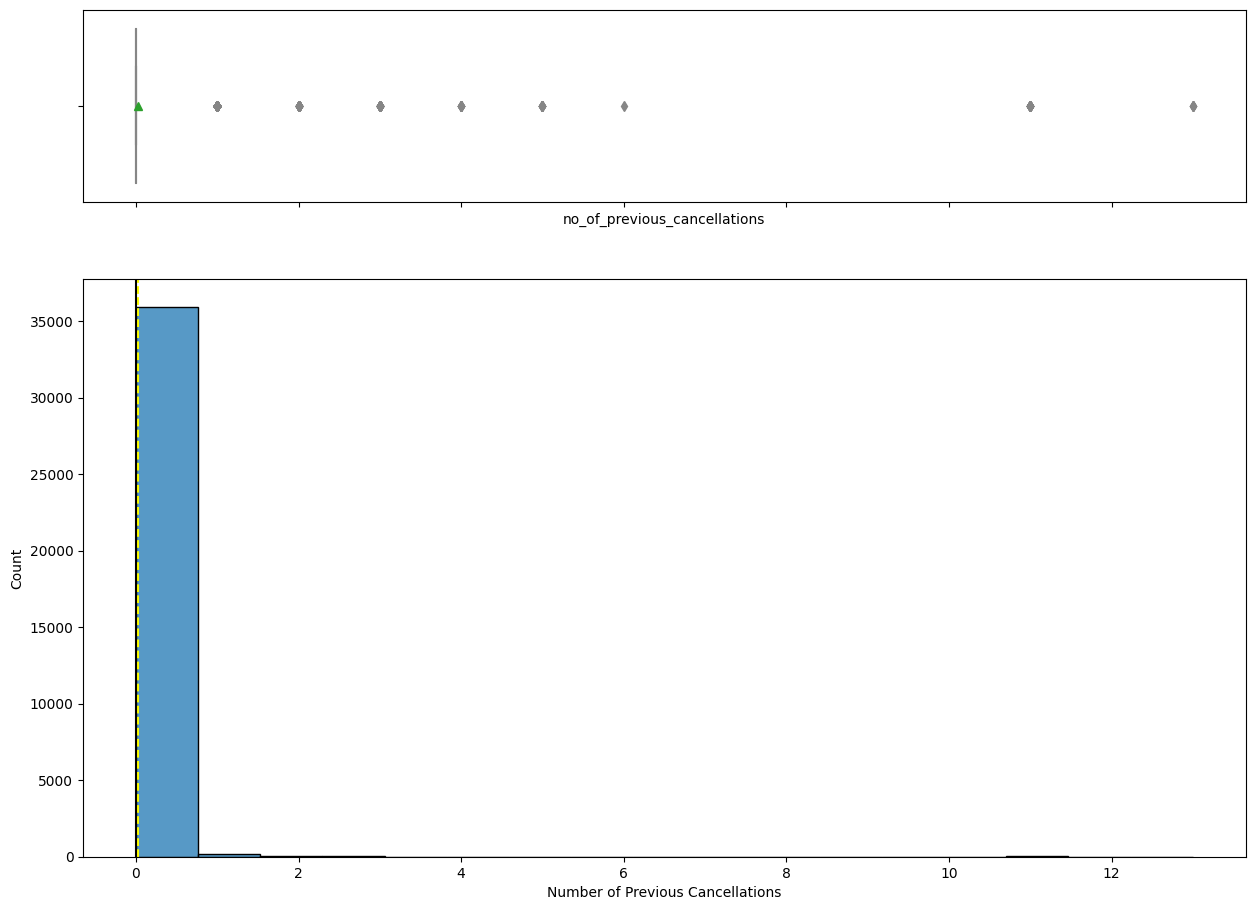

In [65]:
# draw combined histogram and boxplot
histogram_boxplot(data, 'no_of_previous_cancellations')

# label x axis
plt.xlabel('Number of Previous Cancellations');

####Observations
* Number of previous cancellations shows a right-skewed distribution with outliers to one side.

##Observations on Previous Bookings Not Cancelled

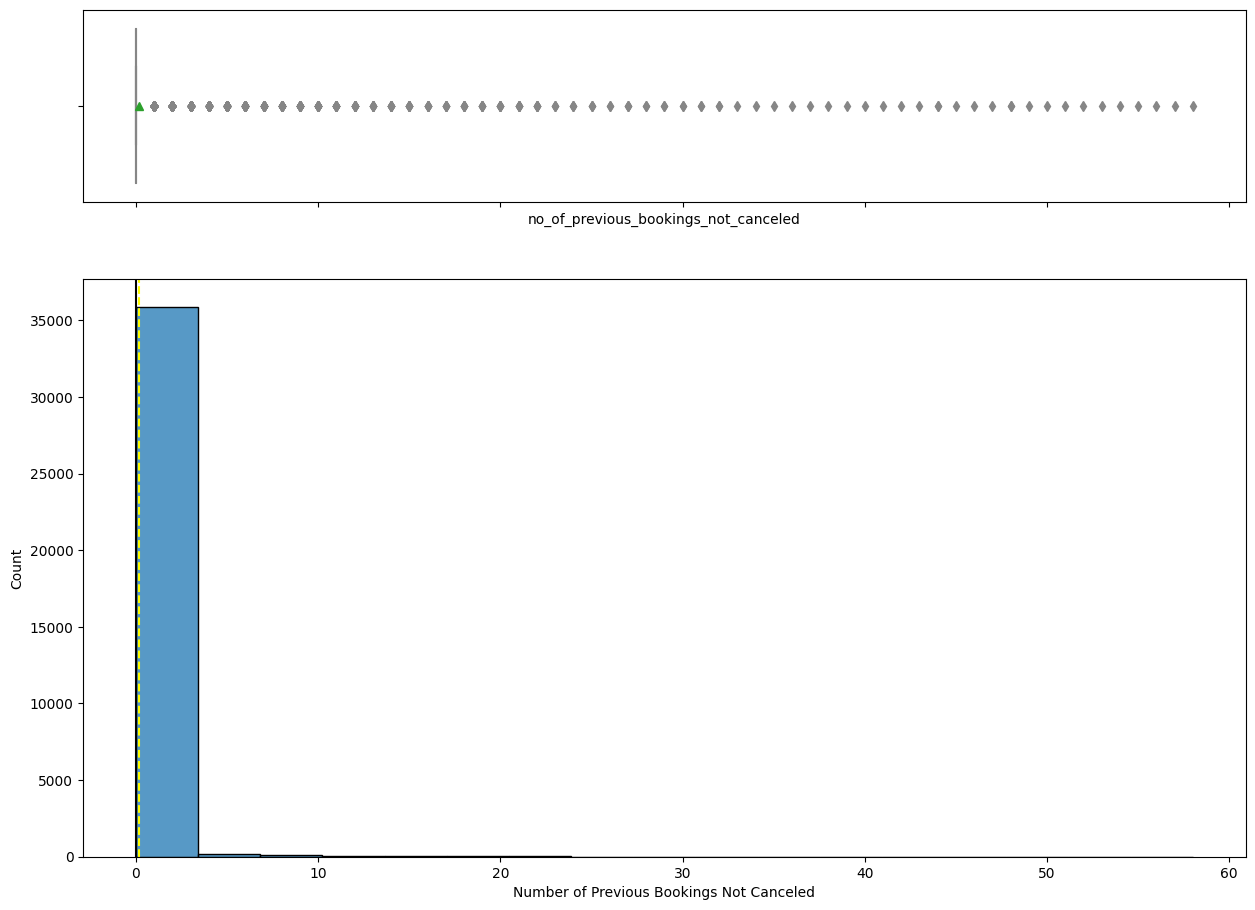

In [66]:
# draw combined histogram and boxplot
histogram_boxplot(data, 'no_of_previous_bookings_not_canceled')

# label x axis
plt.xlabel('Number of Previous Bookings Not Canceled');

####Observations
* Previous booking not canceled shows a right-skewed distribution with outliers to one side.

## Building a Logistic Regression model

In [67]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))

lg = logit.fit(disp = False) 

print(lg.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                  0.3292
Time:                        17:30:32   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

####Observations
* Meal Plan 3 has a large coefficient and a large p-value indicating it is not a statistically significant predictor of booking status.

In [68]:
# check model performance on train set

print('Performance of Train Set:')
model_performance_classification_statsmodels(lg, X_train, y_train)

Performance of Train Set:


Accuracy  Recall  Precision      F1
0   0.80600 0.63410    0.73971 0.68285

####Observations
* Negative values of the coefficient show the probability of a booking cancellation decreases with the increase of the corresponding attribute. 
* Positive values of the coefficient show the probability of a booking cancellation increases with the increase of the corresponding attribute. 
* P-value has a corresponding significance of 0.05. Any variable with a p-value greater than 0.05 is insignificant. 
* Multicolinearity may affect p-values.
* We will use the variance inflation factor to detect multicolinearity.

## Checking Multicollinearity

In [69]:
# define function to check variance inflation factor
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif['feature'] = predictors.columns

    # calculate VIF for each feature
    vif['VIF'] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))]
        
    return vif

In [70]:
# call function on train set
checking_vif(X_train)

feature            VIF
0                                  const 39497686.20788
1                           no_of_adults        1.35113
2                         no_of_children        2.09358
3                   no_of_weekend_nights        1.06948
4                      no_of_week_nights        1.09571
5             required_car_parking_space        1.03997
6                              lead_time        1.39517
7                           arrival_year        1.43190
8                          arrival_month        1.27633
9                           arrival_date        1.00679
10                        repeated_guest        1.78358
11          no_of_previous_cancellations        1.39569
12  no_of_previous_bookings_not_canceled        1.65200
13                    avg_price_per_room        2.06860
14                no_of_special_requests        1.24798
15         type_of_meal_plan_Meal Plan 2        1.27328
16         type_of_meal_plan_Meal Plan 3        1.02526
17        type_of_meal_plan_Not Selected        1.27306
18        room_type_reserved_Room_Type 2        1.10595
19        room_type_reserved_Room_Type 3        1.00330
20        room_type_reserved_Room_Type 4        1.36361
21        room_type_reserved_Room_Type 5        1.02800
22        room_type_reserved_Room_Type 6        2.05614
23        room_type_reserved_Room_Type 7        1.11816
24     market_segment_type_Complementary        4.50276
25         market_segment_type_Corporate       16.92829
26           market_segment_type_Offline       64.11564
27            market_segment_type_Online       71.18026

####Observations
* There are multiple columns with high VIF values, indicating the presence of strong multicollinearity. 
* We will drop columns with a p-value greater than 0.05. 

##Drop High p-value Variables

#### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [71]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


####Observations
* The above list of columns are significant. 
* We will keep all of the significant variable columns.

In [72]:
# create new train set with selected features
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [73]:
# train logistic regression on new train1
logit1 = sm.Logit(y_train, X_train1.astype(float))

lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                  0.3282
Time:                        17:30:37   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

####Observations
* The coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, no_of_previous)cancellations, avg_price_per_room, type_of_meal_plan_ Meal PLan 2, and type_of_meal_plan_ Not Selected all have positive coefficients signifying an icnrease in these variables increases the liklihood of cancellation.
* All variables with a negative coefficient with decrease the liklihood of cancellation as the variable increases. 

In [74]:
# check model performance on train set

print('Performance of Train Set:')
model_performance_classification_statsmodels(lg1,X_train1, y_train)

Performance of Train Set:


Accuracy  Recall  Precision      F1
0   0.80545 0.63267    0.73907 0.68174

####Observations
* Accuracy, recall, precision, and F1-score remain almost unchanged signifying no drastic effect on the model.

###Converting Coefficient to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [75]:
# convert coefficients to odds
odds = np.exp(lg1.params)

# find percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# remove limit from number of columns to display
pd.set_option('display.max_columns', None)

# add odds to dataframe
pd.DataFrame({'Odds': odds, 'Change_odd%': perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11491         1.16546               1.11470   
Change_odd% -100.00000      11.49096        16.54593              11.46966   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04258                     0.20296    1.01583   
Change_odd%            4.25841                   -79.70395    1.58331   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57195        0.95839         0.06478   
Change_odd%      57.19508       -4.16120       -93.52180   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25712             1.01937   
Change_odd%                      25.71181             1.93684   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.22996                        1.17846   
Change_odd%               -77.00374                       17.84641   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.33109                         0.70104   
Change_odd%                        33.10947                       -29.89588   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75364                         0.47885   
Change_odd%                       -24.63551                       -52.11548   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.37977                         0.23827   
Change_odd%                       -62.02290                       -76.17294   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45326                      0.16773  
Change_odd%                      -54.67373                    -83.22724

####Observation
* no_of_adults: Holding all other features constant, a unit change in no_of_adults will increase the odds of a booking cancellation by 1.11 times or an 11% increase in odds.
* no_of_children: Holding all other features constant, a unit change in no_of_children will increase the odds of a booking cancellation by 1.17 times or a 17% increase in odds.
* no_of_weekend_nights: Holding all other features constant, a unit change in no_of_weekend_nights will increase the odds of a booking cancellation by 1.11 times or an 11% increase in odds.
* no_of_week_nights: Holding all other features constant, a unit change in no_of_week_nights will increase the odds of a booking cancellation by 1.04 or  a 4% increase in odds. 
* required_car_parking_space: Holding all other features constant, a unit change in required_car_parking_space will decrease the liklihood of booking cancellation by 20.3 or a 29% decrease in odds.

## Model performance evaluation

Checking model performance on the training set

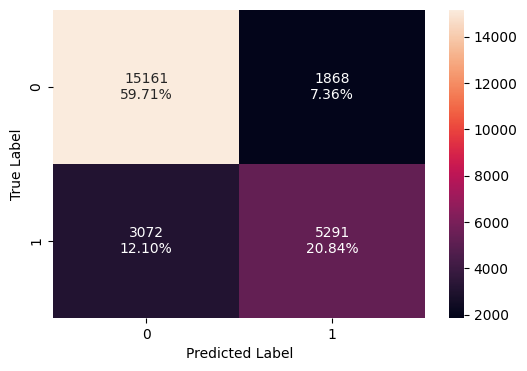

In [76]:
# create confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [77]:
# check model performance on train set
print('Performance of Train Set:')

log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)

log_reg_model_train_perf

Performance of Train Set:


Accuracy  Recall  Precision      F1
0   0.80545 0.63267    0.73907 0.68174

#### Observations
* The model correctly identifies 63% of instances.
* 12.10% of instances produce false negatives.

ROC-AUC on training set

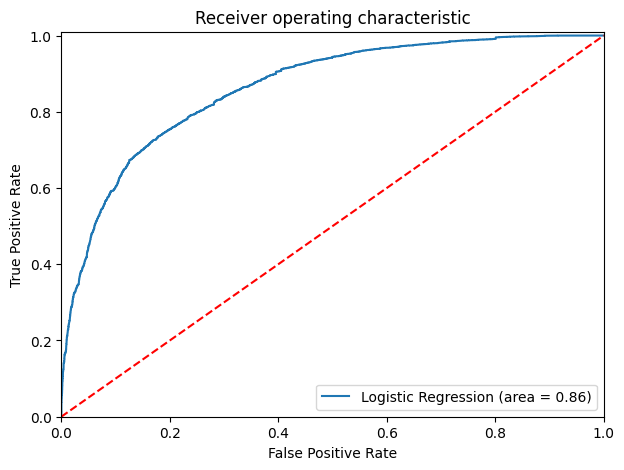

In [78]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

# set figure size
plt.figure(figsize=(7, 5))

plt.plot(fpr, tpr, label= 'Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])

# set labels and title 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

# move legend 
plt.legend(loc='lower right')

plt.show()

####Observations
* An AUC-ROC score of 0.86 indicates the model has good discriminatory power and can effectively distinguish between positive and negative instances in the test data.

###Model Performance Improvement 
* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve

In [79]:
# calculate optimal threshold valye for model base on ROC curve
# optimal cut off = high tpr and low fpr 
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)

optimal_threshold_auc_roc = thresholds[optimal_idx]

print(optimal_threshold_auc_roc)

0.3700522558708252


#### Checking model performance on training set

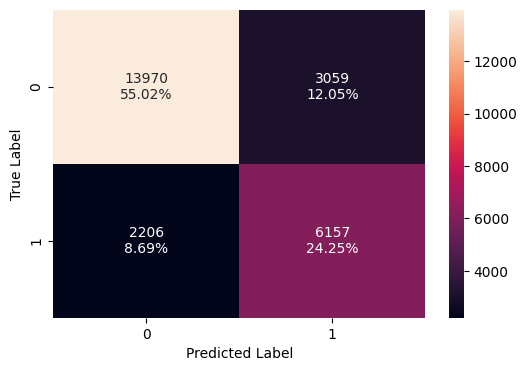

In [80]:
# create confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)

In [81]:
# check model performance
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)

# check model performance on train set
print('Performance of Train Set:')
log_reg_model_train_perf_threshold_auc_roc

Performance of Train Set:


Accuracy  Recall  Precision      F1
0   0.79265 0.73622    0.66808 0.70049

####Observations
* Model performance has improved.
* The model correctly identifies 74% of instances.

###Let's use Precision-Recall curve and see if we can find a better threshold

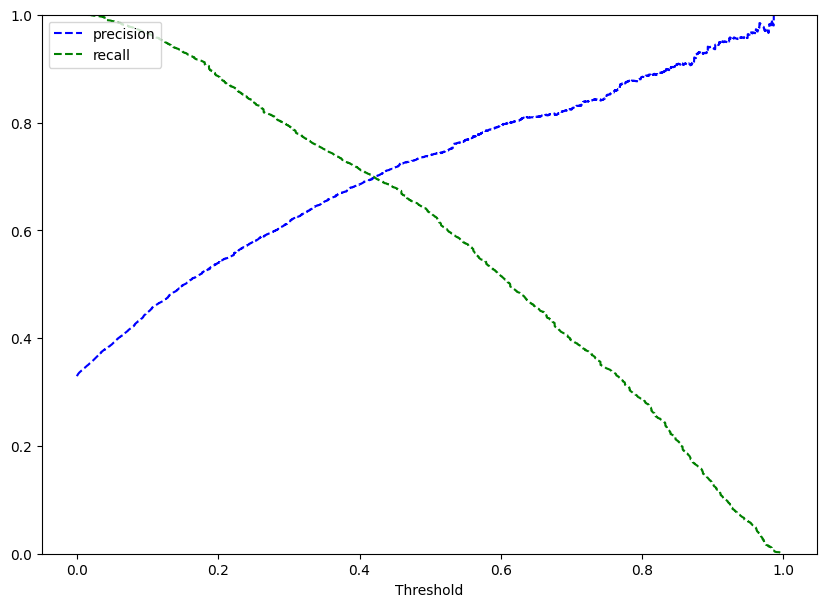

In [82]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

# define function for plot
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label='recall')
    
    # set label
    plt.xlabel('Threshold')

    # move legend
    plt.legend(loc = 'upper left')
    plt.ylim([0, 1])

# set figure size
plt.figure(figsize=(10, 7))

plot_prec_recall_vs_tresh(prec, rec, tre)

plt.show()

####Observations
* At a threshold of approximately 0.42, we get equal precision and recall.

In [83]:
# set threshold
optimal_threshold_curve = 0.42

Check model performance on training set

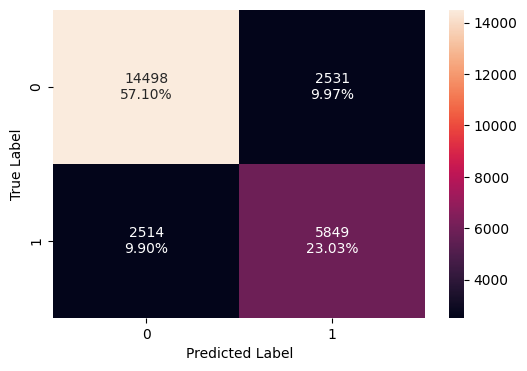

In [84]:
# create confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [85]:
# check model performance
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve)

# check model performance on train set
print('Performance of Train Set:')
log_reg_model_train_perf_threshold_curve

Performance of Train Set:


Accuracy  Recall  Precision      F1
0   0.80132 0.69939    0.69797 0.69868

###Check performance on the test set

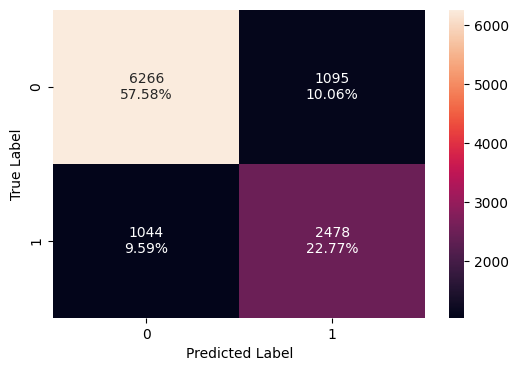

In [86]:
# create confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [87]:
# check model performance
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

# check model performance on test set
print('Performance of Test Set:')
log_reg_model_test_perf_threshold_curve

Performance of Test Set:


Accuracy  Recall  Precision      F1
0   0.80345 0.70358    0.69353 0.69852

####Observations
* Recall of train set has remained consistent at 0.70 and is similar to test set with a recall of 0.70.

###ROC curve on test set

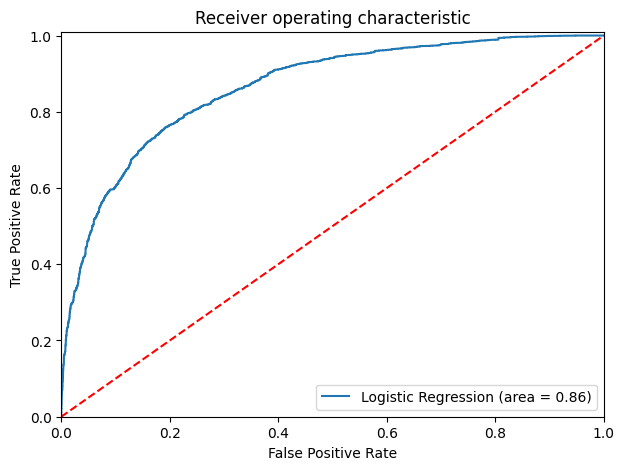

In [88]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))

# set figure size
plt.figure(figsize=(7, 5))

# draw plot
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])

# set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

# move legend
plt.legend(loc='lower right')

plt.show()

####Observations
* An AUC-ROC score of 0.86 indicates the model has good discriminatory power and can effectively distinguish between positive and negative instances in the test data.

###Use model with threshold = 0.37

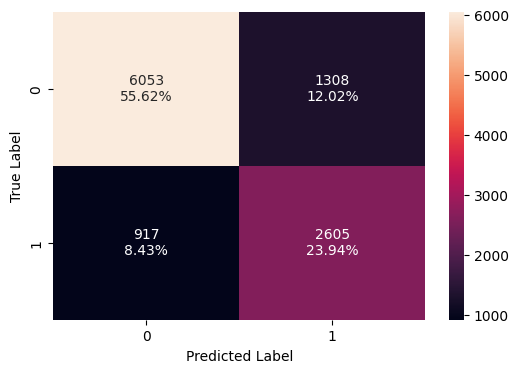

In [89]:
# create confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold = optimal_threshold_auc_roc)

In [90]:
# check model performance
log_reg_model_test_perf_threshold_auc_roc1 = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold= optimal_threshold_auc_roc)

# check model performance on test set
print('Performance of Test Set:')
log_reg_model_test_perf_threshold_auc_roc1

Performance of Test Set:


Accuracy  Recall  Precision      F1
0   0.79555 0.73964    0.66573 0.70074

####Observations
* Recall has increased to 0.74.

###Using model threshold = 0.42

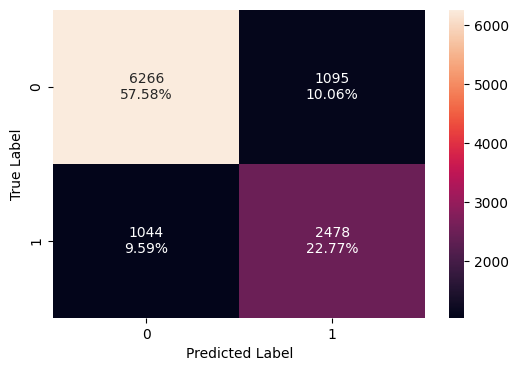

In [91]:
# create confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold = optimal_threshold_curve)

In [92]:
# check model perfomance
log_reg_model_test_perf_threshold_curve2 = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve)

# check model performance on test set
print('Performance of Test Set:')
log_reg_model_test_perf_threshold_curve2

Performance of Test Set:


Accuracy  Recall  Precision      F1
0   0.80345 0.70358    0.69353 0.69852

####Observations
* Recall has decreased to 0.70.

# Model Performance Summary

In [93]:
# compare training performances

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis = 1,
)
models_train_comp_df.columns = [
    'Logistic Regression-default Threshold',
    'Logistic Regression-0.37 Threshold',
    'Logistic Regression-0.42 Threshold',
]

print('Training Performance Comparison:')
models_train_comp_df

Training Performance Comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80545   
Recall                                   0.63267   
Precision                                0.73907   
F1                                       0.68174   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79265   
Recall                                0.73622   
Precision                             0.66808   
F1                                    0.70049   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80132  
Recall                                0.69939  
Precision                             0.69797  
F1                                    0.69868

####Observations
* Recall at 0.37 threshold is highest at 0.74.

In [94]:
# compare testing performance

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf_threshold_curve.T,
        log_reg_model_test_perf_threshold_auc_roc1.T,
        log_reg_model_test_perf_threshold_curve2.T,
    ],
    axis = 1,
)
models_test_comp_df.columns = [
    'Logistic Regression-default Threshold',
    'Logistic Regression-0.37 Threshold',
    'Logistic Regression-0.42 Threshold',
]

print('Testing Performance Comparison:')
models_test_comp_df

Testing Performance Comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80345   
Recall                                   0.70358   
Precision                                0.69353   
F1                                       0.69852   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79555   
Recall                                0.73964   
Precision                             0.66573   
F1                                    0.70074   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80345  
Recall                                0.70358  
Precision                             0.69353  
F1                                    0.69852

####Observations
* Recall at 0.37 threshold is highest on test performance at 0.74, same as train set.

#Conclusions

* All models are giving a generalized performance on training and test set. 
* The highest recall is 74% on the training set.
* Using the model with the default threshold gives lower recall but better precision.
Using the model with 0.42 threshold gives balanced precision and recall.
* Using the model wutg 0.37 threshold gives higher recall and lower precision. However, this threshold also has the highest F1-score of 0.70. 

## Building a Decision Tree model

* We want to predict which bookings will be canceled.
* Before we proceed to build a model, we'll have to encode categorical features.
* We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [95]:
X = data.drop(['booking_status'], axis=1)
Y = data['booking_status']

# encode categorical variables
X = pd.get_dummies(X, drop_first = True)

# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0             2               0                             0   
1             6               0                             0   
2            28               0                             0   
3            20               0                             0   
4            11               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                       0                              0   
1                       1                              0   
2                       0                              0   
3                       0                              0   
4                       0                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0  

In [96]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


####Observations
* We see that approximately 67% of observations belong to Class 0 (Not Failed) and approximately 33% of observations belong to Class 1 (Failed).
* This pattern is preserved across both the train and test sets.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [97]:
# define function to compute metrics to check performance of classification model using sklearn
def model_performance_classification_sklearn(model, predictors, target):
  
    # predict using independent variables
    pred = model.predict(predictors)

    # computer accuracy
    acc = accuracy_score(target, pred)

    # compute recall
    recall = recall_score(target, pred)

    # compute precision
    precision = precision_score(target, pred)

    # compute F1-scoree
    f1 = f1_score(target, pred)

    # create dataframe of metrics
    df_perf = pd.DataFrame(
        {'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1': f1,}, index=[0],)

    return df_perf

In [98]:
# define function to plot confusion matrix with percentages
def confusion_matrix_sklearn(model, predictors, target):

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
            for item in cm.flatten()]).reshape(2, 2)

    # set figure size
    plt.figure(figsize=(6, 4))

    # draw heatmap
    sns.heatmap(cm, annot=labels, fmt="")

    # set labels
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##Building Decision Tree Model

In [99]:
# fit decision tree on train data
model = DecisionTreeClassifier(random_state = 1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

##Check model performance on training set

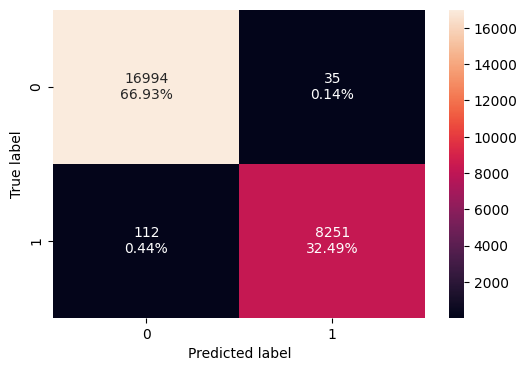

In [100]:
# plot confusion matrix
confusion_matrix_sklearn(model, X_train, y_train)

In [101]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

##Check model performance for test set

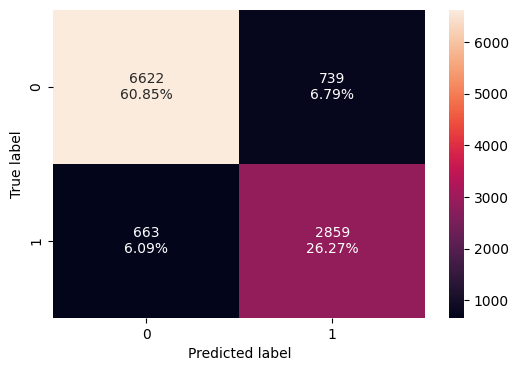

In [102]:
# plot confusion matrix
confusion_matrix_sklearn(model, X_test, y_test)

In [103]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.87118 0.81175    0.79461 0.80309

####Observations
* The model's performance on the train set is high, with accuracy, recall, precision, and F1-score approzimately equal to 0.99.
* The performance of the model on the test set is lower, with accuracy, recall, precision, and F1-score being 0.87, 0.81, 0.79, and 0.80, respectively. This indicates that the model is overfitting.

**Before pruning the tree let's check the important features.**

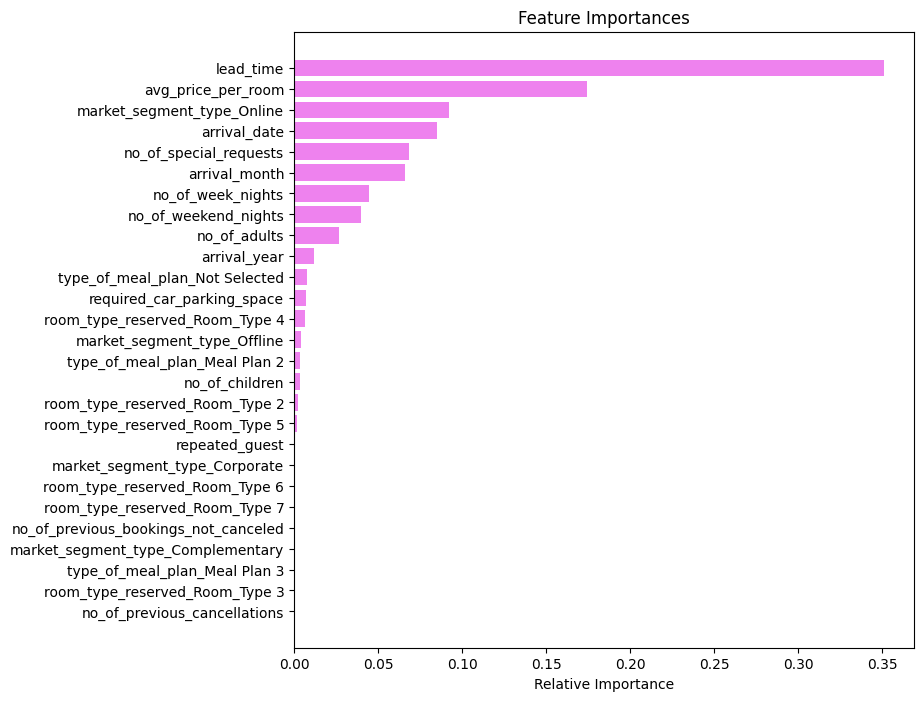

In [104]:
# extract feature names from training data set
feature_names = list(X_train.columns)

# get feature importances from the model
importances = model.feature_importances_

# sort the feature importances in ascending order
indices = np.argsort(importances)

# set figure size
plt.figure(figsize=(8, 8))

# set title and labels
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

####Observations
* Lead time and average price per room are the most imporant features.

###Pruning the Tree

####Pre-Pruning

In [105]:
# choose classifier type
estimator = DecisionTreeClassifier(random_state = 1)

# parameters
parameters = {
    'class_weight': [None, 'balanced'],
    'max_depth': np.arange(2, 7, 2),
    'max_leaf_nodes': [50, 75, 150, 250],
    'min_samples_split': [10, 30, 50, 70],}

# score type
acc_scorer = make_scorer(f1_score)

# run grid search
grid_obj = GridSearchCV(estimator, parameters, scoring = acc_scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# set clf to best combination of parameters
estimator = grid_obj.best_estimator_

# fit best algorithm
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

###Check Performance on Train Set

In [106]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train)

decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.83097 0.78608    0.72425 0.75390

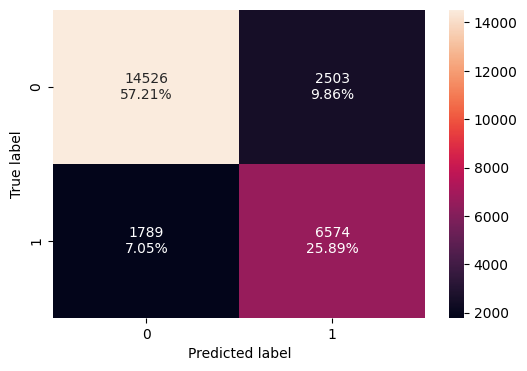

In [107]:
# plot confusion matrix 
confusion_matrix_sklearn(estimator, X_train, y_train)

###Check Performance on Test Set

In [108]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test)

decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

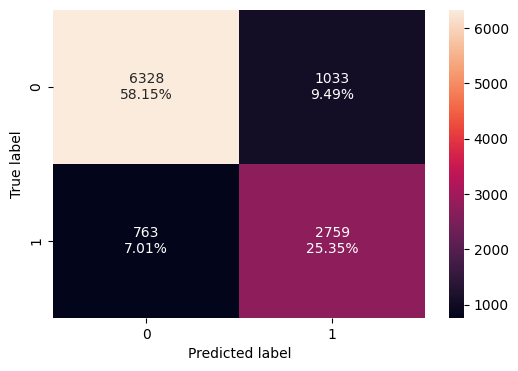

In [109]:
# plot confusion matrix
confusion_matrix_sklearn(estimator, X_test, y_test)

####Observations
* The metrics for the train and test sets are approximately equal. However, the slightly higher test scores indicate the model might be overfitting.

Visualize Decision Tree

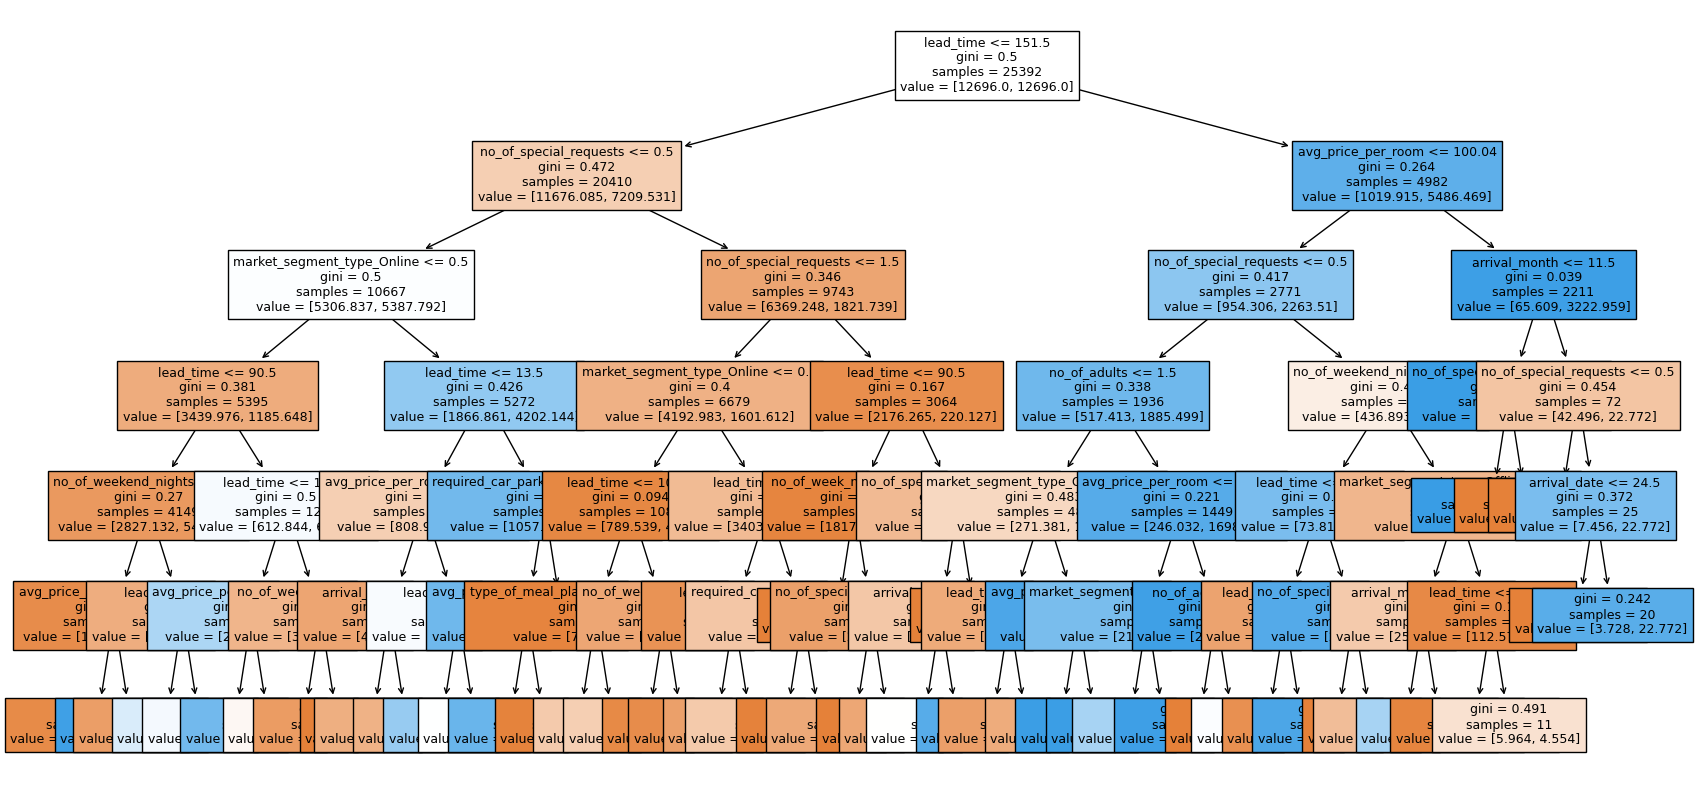

In [110]:
# draw tree plot
plt.figure(figsize = (20, 10))
out = tree.plot_tree(
    estimator,
    feature_names = feature_names,
    filled = True,
    fontsize = 9,
    node_ids = False,
    class_names = None,)

plt.show()

In [111]:
# ouput report showing the rules of decision tree
print(tree.export_text(estimator, feature_names = feature_names, show_weights = True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

####Observations
Using the extracted decision rules we can make interpretations from the decision tree model, such as:

* If the lead time is less than or equal to 151.50, the number of special requests is less than or equal to 0.50, the online market segment type is less than or equal to 0.50, the lead time is less than or equal to 90.50, the no of weekend nights is less than or equal to 0.50, and the average price per room is less than or equal to 196.50, then the booking is likely to cancel.
* Other inferences can be made similarly.
* Overall, lead_time, no_of_special_requests, market_segment_type_online, avg_price_per_room, no_of_weekend_nights, arrival_month, and required_car_parking_space are all important features in the decision tree.
* The decision tree is complex and may be overfitting.

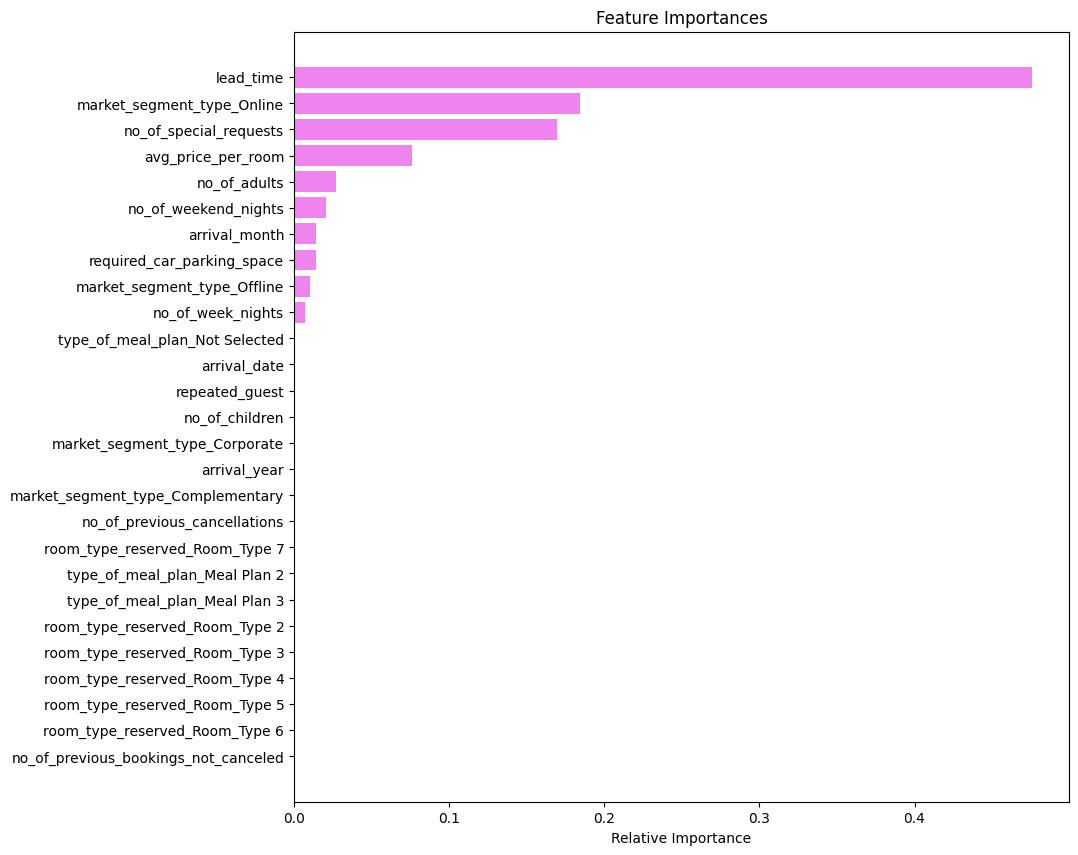

In [112]:
# importance features

importances = estimator.feature_importances_
indices = np.argsort(importances)

# plot figure
plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

####Observations
* Lead time is the most important featured followed by online market segment type and number of special requests.

###Cost Complexity Pruning
* A technique used to prevent overfitting and simplify the decision tree.

In [113]:
# initialize DecisionTreeClassifier object with random state 1 and class weight balanced
clf = DecisionTreeClassifier(random_state=1, class_weight='balanced')

# determine path of cost complexity pruning for training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# extract effective alphas for pruning and impurities at the effective alphas
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [114]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1839     0.00890     0.32806
1840     0.00980     0.33786
1841     0.01272     0.35058
1842     0.03412     0.41882
1843     0.08118     0.50000

[1844 rows x 2 columns]

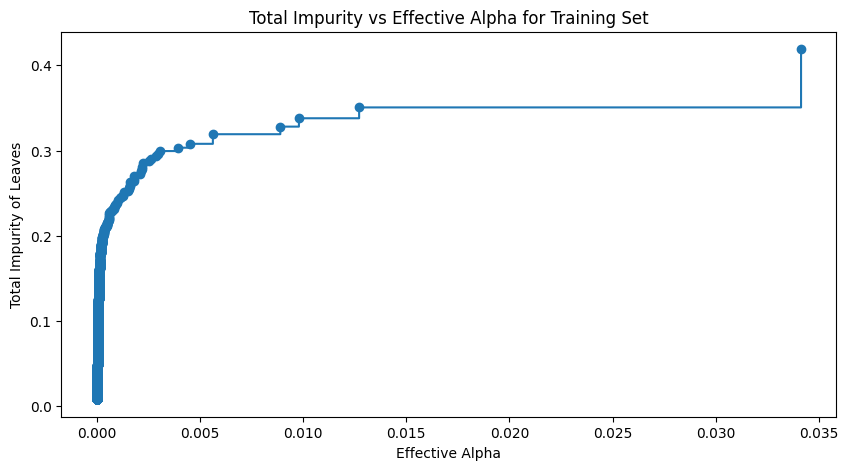

In [115]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(ccp_alphas[:-1], impurities[:-1], marker = 'o', drawstyle = 'steps-post')
ax.set_xlabel('Effective Alpha')
ax.set_ylabel('Total Impurity of Leaves')
ax.set_title('Total Impurity vs Effective Alpha for Training Set')

plt.show()

####Observations
* Effective Alpha control the complexity of the decision tree.
* A small alpha value leads to a complex tree and overfitting, while a large alpha value leads to few notes and a model that is underfitting.
* Total Impurity of Leaves measures how much uncertainty of randomeness is in the final set of predictions. 
* The lowed the Total Impurity of Leaves, the more accurate predictions on the training set. 

####Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [116]:
# create empty list to store decision tree classifiers
clfs = []

# loop through different values of ccp_alpha
for ccp_alpha in ccp_alphas:

    # instantiate a DecisionTreeClassifier object with specified parameters
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight='balanced')
   
    # train classifier on training data
    clf.fit(X_train, y_train)
    
    # add trained classifier to the list
    clfs.append(clf)

# print the number of nodes in the last tree and the corresponding value of ccp_alpha
print('The number of nodes in the last tree is: {} with ccp_alpha: {}'.format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]))


The number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


####Observations
* A Cost-Complexity Pruning Alpha of 0.081 indicates the decision tree was trained with a moderate amount of regularization, resulting in a tree with a moderate number of nodes and moderate complexity.

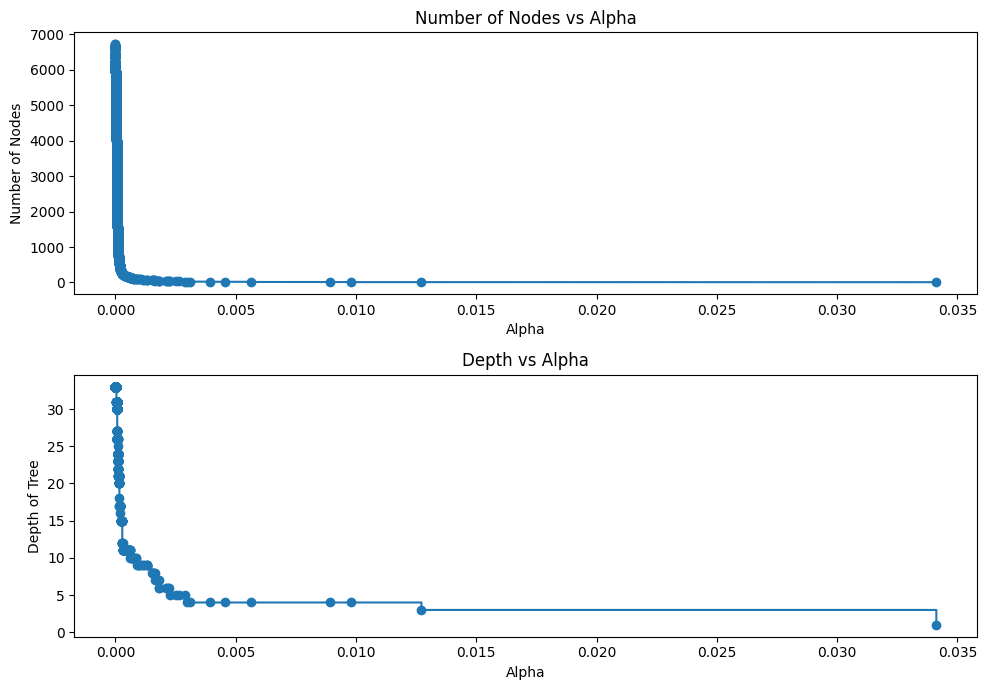

In [117]:
# remove the last classifier and corresponding ccp_alpha from the list and array
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# get number of nodes and depth of each tree in list of classifiers
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# create plot with two subplots to show relationship between alpha and number of nodes/depth of tree
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# plot number of nodes vs alpha on first subplot
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle='steps-post')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('Number of Nodes')
ax[0].set_title('Number of Nodes vs Alpha')

# plot the depth of tree vs alpha on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle='steps-post')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('Depth of Tree')
ax[1].set_title('Depth vs Alpha')

# adjust the layout of the plot for better spacing
fig.tight_layout()


####Observations
* Number of Nodes and Alpha create an inverted U shape. As the number of nodes decreases, alpha increases until it reaches a minimum point before increasing again with number of nodes. 
* Increasing alpha removes more nodes from the decision tree using the cost complexity pruning algorithm.
* The minimum alpha value in the u-shape is optimal.
* As alpha increases, the depth of the tree decreases resulting in a simpler decision tree.

#### F1 Score vs alpha for training and testing sets

In [118]:
# create empty list to store f1-score for training set
f1_train = []

# loop over list of trained decision trees
for clf in clfs:
    
    # make predictions on training set using current decision tree
    pred_train = clf.predict(X_train)
   
    # compute f1-score for training set predictions
    values_train = f1_score(y_train, pred_train)

    # append f1-score to list
    f1_train.append(values_train)

# create empty list to store f1-score for test set
f1_test = []

# loop over list of trained decision trees
for clf in clfs:

    # make predictions on test set using current decision tree
    pred_test = clf.predict(X_test)

    # compute f1-score for test set predictions
    values_test = f1_score(y_test, pred_test)

    # append f1-score to list
    f1_test.append(values_test)


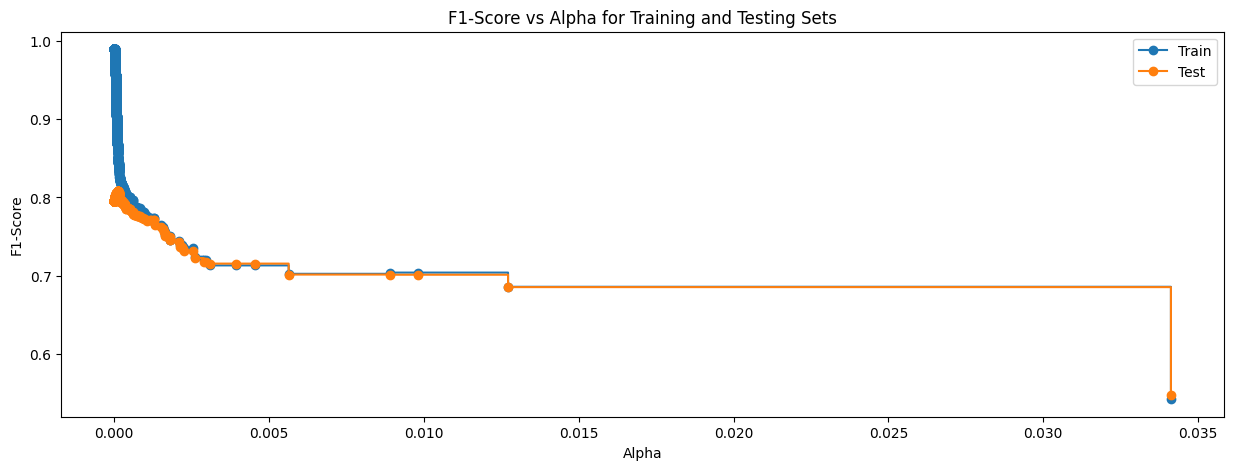

In [119]:
# create plot with figure size 15x5
fig, ax = plt.subplots(figsize=(15, 5))

# set labels and title
ax.set_xlabel('Alpha')
ax.set_ylabel('F1-Score')
ax.set_title('F1-Score vs Alpha for Training and Testing Sets')

# plot F1-score against the alpha values for both training and testing sets
ax.plot(ccp_alphas, f1_train, marker='o', label='Train', drawstyle='steps-post')
ax.plot(ccp_alphas, f1_test, marker='o', label='Test', drawstyle='steps-post')

# add legend
ax.legend()

plt.show()


####Observations
* As alpha increases and the decision tree becomes less complex with fewer nodes, the training set's performance decreases before leveling out to approximately match the test set's performance.
* The F1-score decreases as Alpha increases indicating less overfitting of the model. 

In [120]:
# find index of model with highest F1-score on test set
index_best_model = np.argmax(f1_test) 

# select best model based on index found above
best_model = clfs[index_best_model] 

# print details of best model
print(best_model) 


DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


####Observations
* The best model has an Alpha value of 0.001227, creating a more complex tree with more nodes.

##Check Performance on Train Set

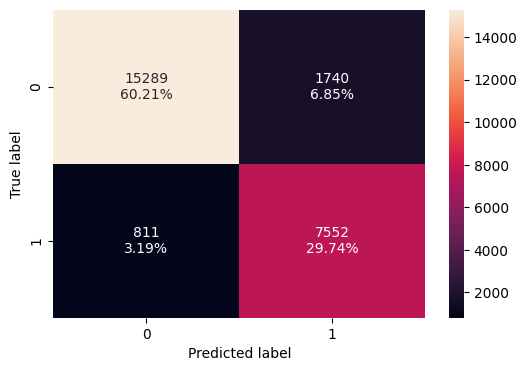

In [121]:
# plot confusion matrix
confusion_matrix_sklearn(best_model, X_train, y_train)

####Observation
* True Positive (TP) = 60.21%
* False Negative (FN) = 6.85%
* False Positive (FP) = 3.19%
* True Negative (TN) = 29.74%

In [122]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train)

decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.89954 0.90303    0.81274 0.85551

##Check Performance on Test Set

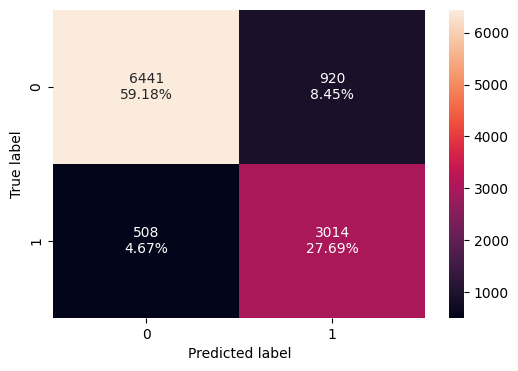

In [123]:
# plot confusion matrix
confusion_matrix_sklearn(best_model, X_test, y_test)

####Observation
* True Positive (TP) = 59.18%
* False Negative (FN) = 8.45%
* False Positive (FP) = 4.67%
* True Negative (TN) = 27.69%

In [124]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86879 0.85576    0.76614 0.80848

####Observations 
* The F1-score of the train set is 0.856 and the F1-score of the test set is 0.81. The model is performing reasonably well.

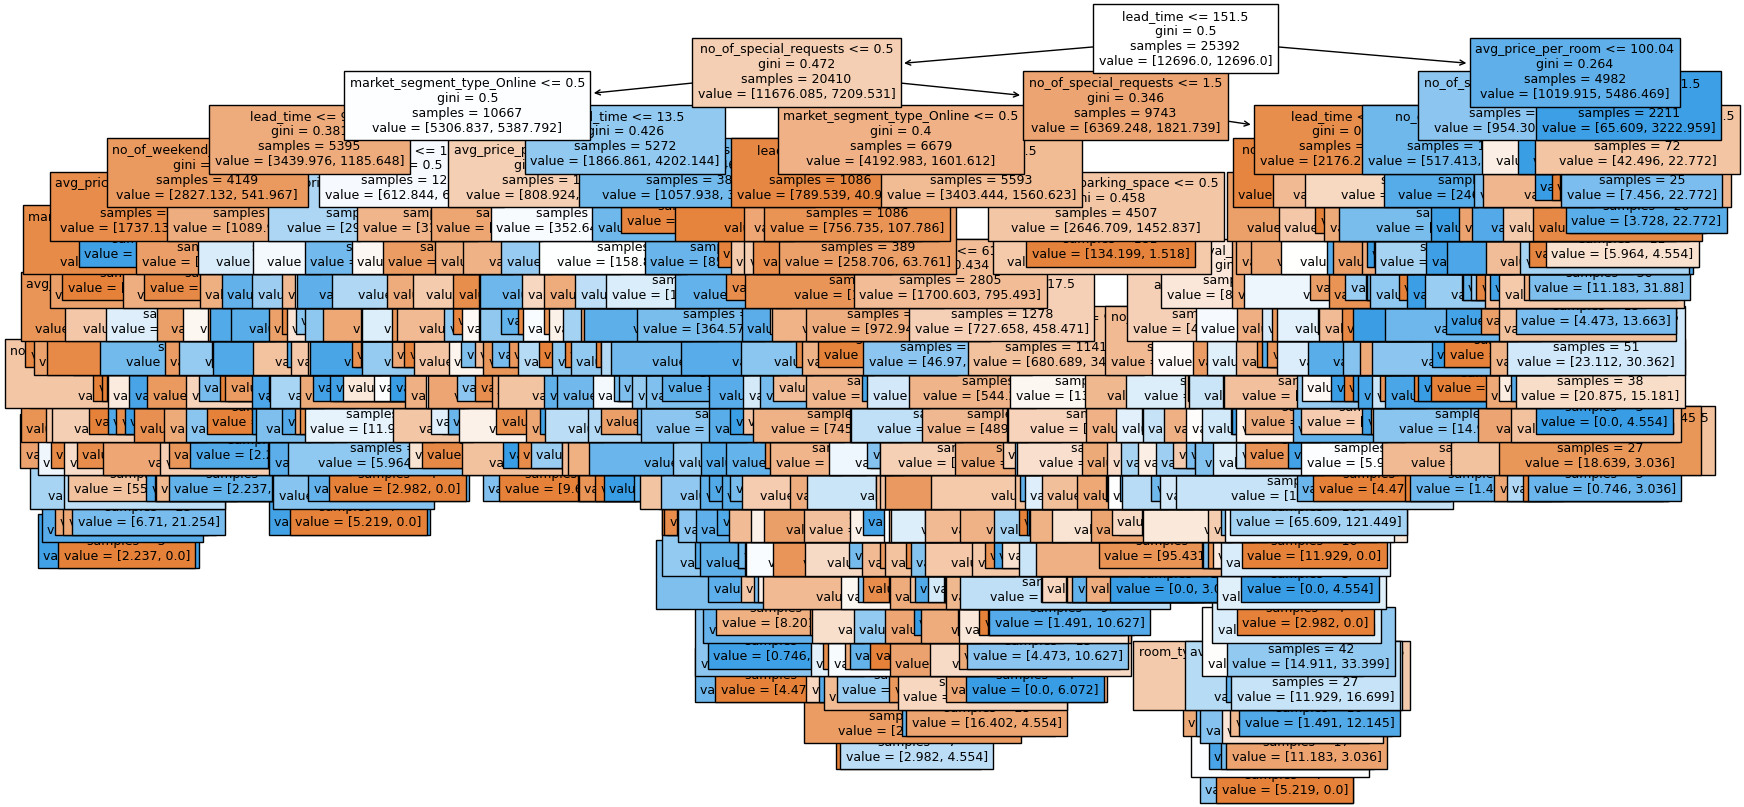

In [125]:
# set figure size
plt.figure(figsize=(20, 10))

# plot decision tree using best model with parameters
out = tree.plot_tree(
    best_model,
    feature_names=feature_names,  # names of the features
    filled=True,  # fill nodes with colors
    fontsize=9,  # set font size
    node_ids=False,  # do not display node IDs
    class_names=None,  # so not display class names
)

plt.show()


In [126]:
# output report showing rules of decision tree

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

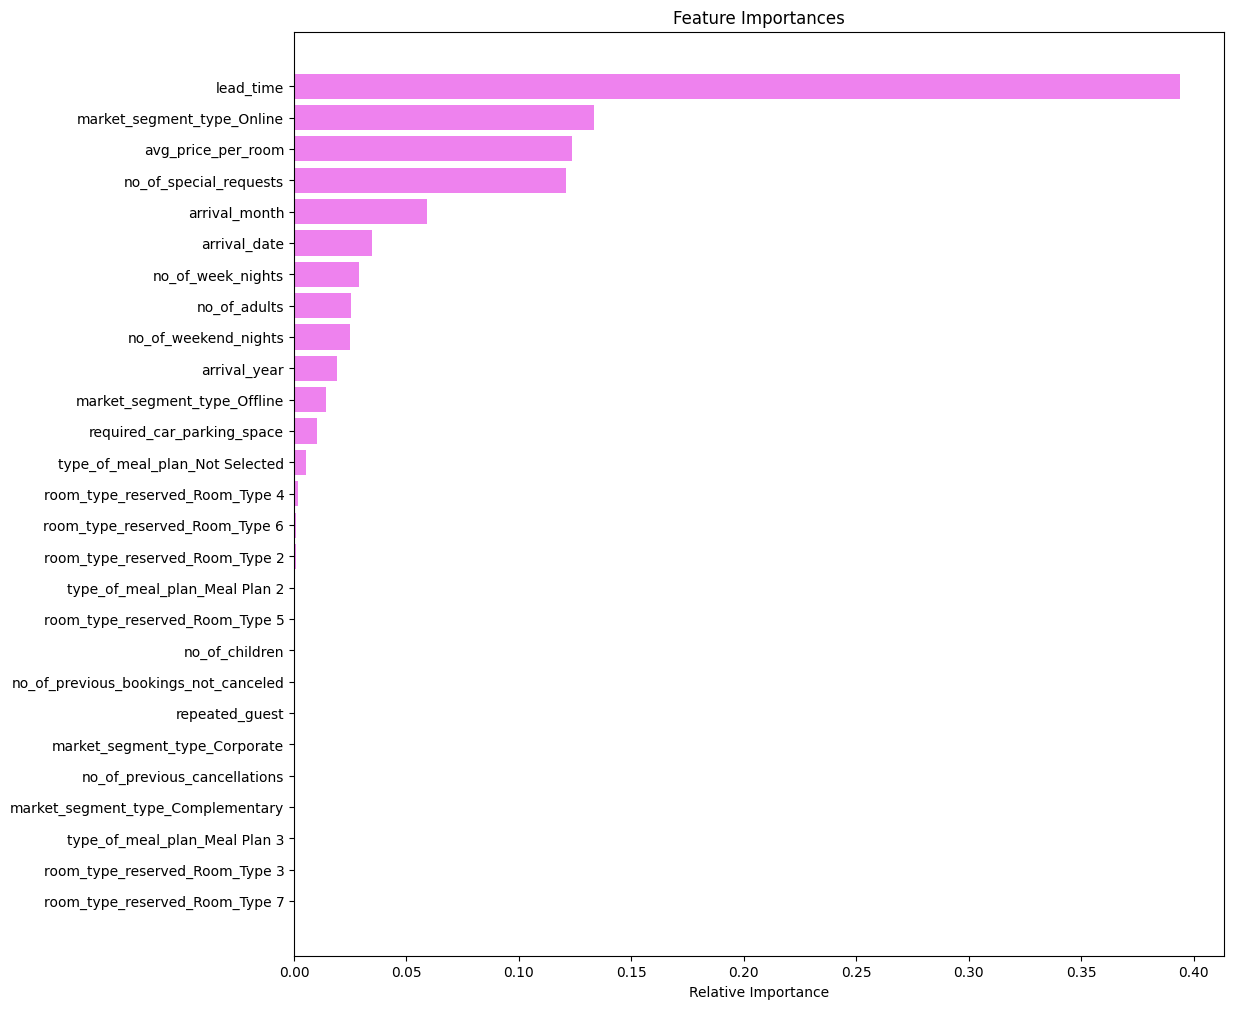

In [127]:
importances = best_model.feature_importances_ # get feature importances from the model
indices = np.argsort(importances) # sort feature importances by ascending order

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center') # plot horizontal bar chart of feature importances
plt.yticks(range(len(indices)), [feature_names[i] for i in indices]) # set y-axis as feature names sorted by importance
plt.xlabel('Relative Importance') # set x-axis label
plt.show()


####Observations
* The most important features for the decision tree are lead time, online market segment, average price per room, and number of special requests.

##Comparing Decision Tree Models

In [128]:
# concatenate dataframes with training performance metrics
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T, # dataframe for Decision Tree sklearn
        decision_tree_tune_perf_train.T, # dataframe for Decision Tree (Pre-Pruning)
        decision_tree_post_perf_train.T, # dataframe for Decision Tree (Post-Pruning)
    ],
    axis=1,)

# set column names for concatenated dataframe
models_train_comp_df.columns = [
    'Decision Tree sklearn',
    'Decision Tree (Pre-Pruning)',
    'Decision Tree (Post-Pruning)',
]

# print dataframe with message indicating it shows training performance comparison
print('Training performance comparison:')
models_train_comp_df


Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99421                      0.83097   
Recall                   0.98661                      0.78608   
Precision                0.99578                      0.72425   
F1                       0.99117                      0.75390   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89954  
Recall                          0.90303  
Precision                       0.81274  
F1                              0.85551

In [129]:
# concatenate dataframes with training performance metrics
models_test_comp_df = pd.concat(
    [
    decision_tree_perf_test.T, # dataframe for Decision Tree sklearn
    decision_tree_tune_perf_test.T, # dataframe for Decision Tree (Pre-Pruning)
    decision_tree_post_test.T, # dataframe for Decision Tree (Post-Pruning)
], 
axis=1)

# set column names for concatenated dataframe
models_test_comp_df.columns = [
    'Decision Tree sklearn',
    'Decision Tree (Pre-Pruning)',
    'Decision Tree (Post-Pruning)',
]

# print dataframe with message indicating it shows training performance comparison
print('Test set performance comparison:')
models_test_comp_df


Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.87118                      0.83497   
Recall                   0.81175                      0.78336   
Precision                0.79461                      0.72758   
F1                       0.80309                      0.75444   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86879  
Recall                          0.85576  
Precision                       0.76614  
F1                              0.80848

####Observations
* The post-pruning test model shows the highest F1-score of 0.81.
* This model "best_model" would be used for future predictions.

## Actionable Insights and Recommendations



* Lead time, room price, number of special requests, and online bookings have the highest effect on cancellations.
* Implementing an online cancellation policy could reduce the number of cancellations from the online market segment. 
* Implementing more personalized services in the form of more special requests could reduce the number of cancellations as more special requests equate to a lower cancellation rate. 
* Repeat guests are less likely to cancel their bookings. Implementing incentives and a customer loyalty and reward program could also decrease cancellation rates. 
* Market research needs to be conducted regularly in order to offer the most competitive room rates. As the price of the room increases so does the liklihood a guest will cancel. Similarly, increased lead time (approximately 5 months) significantly increases the liklihood of cancellation. This is probably due to customers shopping around for a better deal. By implemementing a cancellation penalty and a cancellation clause in the form of a fee and contract, the hotel will remain more profitable and lower cancellation rates due to high prices or high lead times.
* The hotel should consider offering reduced rates for customers who book five to six months in advance. Similarly, they can institute a non-refundable reservation fee for rooms booked in advance up to a certain amount of time. 

In [134]:
# code to convert Jupyter notebook in Google Colab to html format for submission
%%shell
jupyter nbconvert --to html ///content/INNHotels_Kimberly_Magerl14.ipynb

[NbConvertApp] Converting notebook ///content/INNHotels_Kimberly_Magerl14.ipynb to html
[NbConvertApp] Writing 4968620 bytes to /content/INNHotels_Kimberly_Magerl14.html
